<a href="https://colab.research.google.com/github/Priyatomar-56/Taxi_Fare_Prediction/blob/main/Taxi_Fare_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -q kaggle

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"priyatomar1","key":"aee8051608a703bca74cb7d4a1385e19"}'}

In [ ]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle competitions download -c new-york-city-taxi-fare-prediction

100% 1.55G/1.56G [00:18<00:00, 103MB/s] 
100% 1.56G/1.56G [00:18<00:00, 91.3MB/s]


In [ ]:
!unzip new-york-city-taxi-fare-prediction

Archive:  new-york-city-taxi-fare-prediction.zip
  inflating: GCP-Coupons-Instructions.rtf  
  inflating: sample_submission.csv   
  inflating: test.csv                
  inflating: train.csv               

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
train = pd.read_csv("/content/train.csv", nrows = 1000000)
test = pd.read_csv("/content/test.csv")
NYC_test=pd.read_csv("/content/CS550/Prog_Assignments/assignment_3_dataset/test_data_ny_taxi_fare_prediction.csv")

In [ ]:
print("shape of the Train data:", train.shape)
print("shape of the Test data:", test.shape)

shape of the Train data: (1000000, 8)
shape of the Test data: (9914, 7)


In [ ]:
NYC_test.shape

(50, 8)

In [ ]:
train.head()# head function is to see how the cells/data is looking like.#Let’s take a look at the top five rows using the DataFrame’s head() method

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1


In [ ]:

test.head()

,key,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2015-01-27 13:08:24.0000002,2015-01-27 13:08:24 UTC,-73.973320,40.763805,-73.981430,40.743835,1
1,2015-01-27 13:08:24.0000003,2015-01-27 13:08:24 UTC,-73.986862,40.719383,-73.998886,40.739201,1
2,2011-10-08 11:53:44.0000002,2011-10-08 11:53:44 UTC,-73.982524,40.751260,-73.979654,40.746139,1
3,2012-12-01 21:12:12.0000002,2012-12-01 21:12:12 UTC,-73.981160,40.767807,-73.990448,40.751635,1
4,2012-12-01 21:12:12.0000003,2012-12-01 21:12:12 UTC,-73.966046,40.789775,-73.988565,40.744427,1


# Data Cleaning

In [ ]:
# Check for Missing Values
train.isnull().sum()

key                   0
fare_amount           0
pickup_datetime       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude    10
dropoff_latitude     10
passenger_count       0
dtype: int64

In [ ]:
test.isnull().sum()

key                  0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

In [ ]:
#drop the missing values from the train dataframe
train = train.drop(train[train.isnull().any(1)].index, axis = 0)

In [ ]:
train.isnull().sum()

key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

Now, there are no missing values.

In [ ]:
train['fare_amount'].describe()

count    999990.000000
mean         11.347953
std           9.821790
min         -44.900000
25%           6.000000
50%           8.500000
75%          12.500000
max         500.000000
Name: fare_amount, dtype: float64

We See, fare amount has values less than or equal to 0 which is not possible so we remove those rows

In [ ]:
train = train.drop(train[train['fare_amount']<=0].index, axis=0)
print("Shape of Train: ", train.shape)

Shape of Train:  (999923, 8)


In [ ]:
train['fare_amount'].describe()

count    999923.000000
mean         11.348945
std           9.821201
min           0.010000
25%           6.000000
50%           8.500000
75%          12.500000
max         500.000000
Name: fare_amount, dtype: float64

lets check for passenger count

In [ ]:
train['passenger_count'].describe()

count    999923.000000
mean          1.684955
std           1.323921
min           0.000000
25%           1.000000
50%           1.000000
75%           2.000000
max         208.000000
Name: passenger_count, dtype: float64

In [ ]:
test['passenger_count'].describe()

count    9914.000000
mean        1.671273
std         1.278747
min         1.000000
25%         1.000000
50%         1.000000
75%         2.000000
max         6.000000
Name: passenger_count, dtype: float64

In [ ]:
train['passenger_count'].value_counts()

1      691292
2      148098
5       70593
3       43762
4       21427
6       21195
0        3555
208         1
Name: passenger_count, dtype: int64

drop the irrelavnt value from the passenger count column.

In [ ]:
NY_test =pd.DataFrame(train['pickup_datetime'])

In [ ]:
NYC_test = NY_test + NYC_test


In [ ]:
NYC_test.isnull().sum()

dropoff_latitude     999923
dropoff_longitude    999923
key                  999923
passenger_count      999923
pickup_datetime      999923
pickup_latitude      999923
pickup_longitude     999923
test_id              999923
dtype: int64

In [ ]:
NYC_test = NYC_test.drop(NYC_test[NYC_test.isnull().any(1)].index, axis = 0)

In [ ]:
train = train.drop(train[train['passenger_count']<=0].index, axis=0)
train = train.drop(train[train['passenger_count']>=7].index, axis=0)

In [ ]:
print("Shape of Train: ", train.shape)

Shape of Train:  (996327, 8)


In [ ]:
train.columns

Index(['key', 'fare_amount', 'pickup_datetime', 'pickup_longitude',
       'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude',
       'passenger_count'],
      dtype='object')

Now, lets check lattitudes and longitudes

We know that:

Lattitudes range between -90 to 90
Longitudes range between -180 to 180
We can use this data to filter more data

In [ ]:
train = train.drop(train[train['pickup_latitude']<-90].index, axis=0)
train = train.drop(train[train['pickup_latitude']>90].index, axis=0)

train = train.drop(train[train['dropoff_latitude']<-90].index, axis=0)
train = train.drop(train[train['dropoff_latitude']>90].index, axis=0)
train = train.drop(train[train['pickup_longitude']<-180].index, axis=0)
train = train.drop(train[train['pickup_longitude']>180].index, axis=0)

train = train.drop(train[train['dropoff_longitude']<-180].index, axis=0)
train = train.drop(train[train['dropoff_longitude']>180].index, axis=0)

In [ ]:
print("Shape of Train: ", train.shape)

Shape of Train:  (999883, 8)


In [ ]:
test = test.drop(test[test['pickup_latitude']<-90].index, axis=0)
test = test.drop(test[test['pickup_latitude']>90].index, axis=0)

test = test.drop(test[test['dropoff_latitude']<-90].index, axis=0)
test = test.drop(test[test['dropoff_latitude']>90].index, axis=0)
test = test.drop(test[test['pickup_longitude']<-180].index, axis=0)
test = test.drop(test[test['pickup_longitude']>180].index, axis=0)

test = test.drop(test[test['dropoff_longitude']<-180].index, axis=0)
test = test.drop(test[test['dropoff_longitude']>180].index, axis=0)


In [ ]:
NYC_test = NYC_test.drop(NYC_test[NYC_test['pickup_latitude']<-90].index, axis=0)
NYC_test = NYC_test.drop(test[test['pickup_latitude']>90].index, axis=0)

NYC_test = NYC_test.drop(NYC_test[NYC_test['dropoff_latitude']<-90].index, axis=0)
NYC_test = NYC_test.drop(NYC_test[NYC_test['dropoff_latitude']>90].index, axis=0)
NYC_test = NYC_test.drop(NYC_test[NYC_test['pickup_longitude']<-180].index, axis=0)
NYC_test = NYC_test.drop(NYC_test[NYC_test['pickup_longitude']>180].index, axis=0)

NYC_test = NYC_test.drop(NYC_test[NYC_test['dropoff_longitude']<-180].index, axis=0)
NYC_test = NYC_test.drop(NYC_test[NYC_test['dropoff_longitude']>180].index, axis=0)

In [ ]:
print("Shape of Test: ", test.shape)

Shape of Test:  (9914, 7)


In [ ]:
train.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,999883.000000,999883.000000,999883.000000,999883.000000,999883.000000,999883.000000
mean,11.348918,-72.517430,39.926812,-72.515719,39.926137,1.684953
std,9.821187,10.393175,6.089191,10.395685,6.092901,1.323910
min,0.010000,-128.175950,-74.016587,-121.391248,-74.035197,0.000000
25%,6.000000,-73.992060,40.734965,-73.991385,40.734047,1.000000
50%,8.500000,-73.981792,40.752695,-73.980135,40.753166,1.000000
75%,12.500000,-73.967095,40.767153,-73.963654,40.768129,2.000000
max,500.000000,40.850357,69.400000,45.581619,81.510177,208.000000


In [ ]:
test.describe()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000
mean,-73.974722,40.751041,-73.973657,40.751743,1.671273
std,0.042774,0.033541,0.039072,0.035435,1.278747
min,-74.252193,40.573143,-74.263242,40.568973,1.000000
25%,-73.992501,40.736125,-73.991247,40.735254,1.000000
50%,-73.982326,40.753051,-73.980015,40.754065,1.000000
75%,-73.968013,40.767113,-73.964059,40.768757,2.000000
max,-72.986532,41.709555,-72.990963,41.696683,6.000000


In [ ]:
NYC_test.head()

,dropoff_latitude,dropoff_longitude,key,passenger_count,pickup_datetime,pickup_latitude,pickup_longitude,test_id


## conversion of object datatype in datatime format

In [ ]:
NYC_test.describe()

,dropoff_latitude,dropoff_longitude,key,passenger_count,pickup_latitude,pickup_longitude,test_id
count,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# here we are changing the datatype of the key and the pickup_datetime from object to datetime
train['key'] = pd.to_datetime(train['key'])
train['pickup_datetime']  = pd.to_datetime(train['pickup_datetime'])

In [ ]:
# here we are changing the datatype of the key and the pickup_datetime from object to datetime
test['key'] = pd.to_datetime(test['key'])
test['pickup_datetime']  = pd.to_datetime(test['pickup_datetime'])

In [ ]:
# here we are changing the datatype of the key and the pickup_datetime from object to datetime
NYC_test['key'] = pd.to_datetime(NYC_test['key'])
NYC_test['pickup_datetime']  = pd.to_datetime(NYC_test['pickup_datetime'])

In [ ]:
train.dtypes, test.dtypes

(key                       datetime64[ns]
 fare_amount                      float64
 pickup_datetime      datetime64[ns, UTC]
 pickup_longitude                 float64
 pickup_latitude                  float64
 dropoff_longitude                float64
 dropoff_latitude                 float64
 passenger_count                    int64
 dtype: object, key                       datetime64[ns]
 pickup_datetime      datetime64[ns, UTC]
 pickup_longitude                 float64
 pickup_latitude                  float64
 dropoff_longitude                float64
 dropoff_latitude                 float64
 passenger_count                    int64
 dtype: object)

In [ ]:
train.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,996327.000000,996327.000000,996327.000000,996327.000000,996327.000000,996327.000000
mean,11.358141,-72.516598,39.926279,-72.515035,39.925683,1.690758
std,9.831069,10.396380,6.092109,10.398391,6.095567,1.306180
min,0.010000,-128.175950,-74.016587,-121.391248,-74.035197,1.000000
25%,6.000000,-73.992059,40.734960,-73.991383,40.734043,1.000000
50%,8.500000,-73.981792,40.752692,-73.980134,40.753163,1.000000
75%,12.500000,-73.967092,40.767152,-73.963650,40.768127,2.000000
max,500.000000,40.850357,69.400000,45.581619,81.510177,6.000000


In [ ]:
test.describe()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000
mean,-73.974722,40.751041,-73.973657,40.751743,1.671273
std,0.042774,0.033541,0.039072,0.035435,1.278747
min,-74.252193,40.573143,-74.263242,40.568973,1.000000
25%,-73.992501,40.736125,-73.991247,40.735254,1.000000
50%,-73.982326,40.753051,-73.980015,40.754065,1.000000
75%,-73.968013,40.767113,-73.964059,40.768757,2.000000
max,-72.986532,41.709555,-72.990963,41.696683,6.000000


We can see that the data types are fixed
We can also see that the pickup and dropoff location coordinates are coming to be from outside the city. We will remove such rows from the Training Set as we are only building a model for the city.

In [ ]:
def select_outside_boundingbox(df, BB):
    filter_df = df.loc[(df['pickup_longitude'] < BB[0]) | (df['pickup_longitude'] > BB[1]) | \
           (df['pickup_latitude'] < BB[2]) | (df['pickup_latitude'] > BB[3]) | \
           (df['dropoff_longitude'] < BB[0]) | (df['dropoff_longitude'] > BB[1]) | \
           (df['dropoff_latitude'] < BB[2]) | (df['dropoff_latitude'] > BB[3])]
    return filter_df

NYC_BB = (-74.5, -72.8, 40.5, 41.8)

In [ ]:
Train_outliers = select_outside_boundingbox(train, NYC_BB)
Train_outliers

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
11,2012-12-24 11:24:00.000000980,5.5,2012-12-24 11:24:00+00:00,0.0,0.0,0.0,0.0,3
15,2013-11-23 12:57:00.000000190,5.0,2013-11-23 12:57:00+00:00,0.0,0.0,0.0,0.0,1
26,2011-02-07 20:01:00.000000114,6.5,2011-02-07 20:01:00+00:00,0.0,0.0,0.0,0.0,1
124,2013-01-17 17:22:00.000000430,8.0,2013-01-17 17:22:00+00:00,0.0,0.0,0.0,0.0,2
192,2010-09-05 17:08:00.000000920,3.7,2010-09-05 17:08:00+00:00,0.0,0.0,0.0,0.0,5
...,...,...,...,...,...,...,...,...
999713,2013-06-07 20:40:21.000000300,8.0,2013-06-07 20:40:21+00:00,0.0,0.0,0.0,0.0,2
999723,2013-03-03 13:18:00.000000227,3.5,2013-03-03 13:18:00+00:00,0.0,0.0,0.0,0.0,6
999731,2014-05-04 23:27:00.000000103,9.0,2014-05-04 23:27:00+00:00,0.0,0.0,0.0,0.0,6
999888,2010-04-28 21:08:00.000000380,9.3,2010-04-28 21:08:00+00:00,0.0,0.0,0.0,0.0,3


In [ ]:
# Remove the outliers from the train dataframe
train = train.drop(Train_outliers.index, axis=0)

In [ ]:
#Doing the same for test set

test_outliers = select_outside_boundingbox(test, NYC_BB)
test_outliers

,key,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count


In [ ]:
test = test.drop(test_outliers.index, axis=0)

In [ ]:
NYC_outliers = select_outside_boundingbox(NYC_test, NYC_BB)
NYC_outliers

,dropoff_latitude,dropoff_longitude,key,passenger_count,pickup_datetime,pickup_latitude,pickup_longitude,test_id


In [ ]:
NYC_test = NYC_test.drop(NYC_outliers.index, axis=0)

In [ ]:
print("Shape of Train: ", train.shape)
print("Shape of Test: ", test.shape)

Shape of Train:  (975512, 8)
Shape of Test:  (9914, 7)


In [ ]:
print("Shape of Test: ", NYC_test.shape)

splitting the pickup_datetime in hour, weekday, monthday,week,year, month

In [ ]:

data = [train,test]

for i in data:
    i["Hour"] = i.pickup_datetime.dt.hour
    i["week_day"] = i.pickup_datetime.dt.weekday
    i["Day_of_month"] = i.pickup_datetime.dt.day
    i["Week"] = i.pickup_datetime.dt.isocalendar().week
    i["Month"] = i.pickup_datetime.dt.month
    i["Year"] = i.pickup_datetime.dt.year

In [ ]:
data = [train,test,NYC_test]

for i in data:
    i["Hour"] = i.pickup_datetime.dt.hour
    i["week_day"] = i.pickup_datetime.dt.weekday
    i["Day_of_month"] = i.pickup_datetime.dt.day
    i["Week"] = i.pickup_datetime.dt.isocalendar().week
    i["Month"] = i.pickup_datetime.dt.month
    i["Year"] = i.pickup_datetime.dt.year

In [ ]:

# Remove the pickup_datetime column since it's no longer needed
train = train.drop(['pickup_datetime'], axis=1)
test = test.drop(['pickup_datetime'], axis=1)

In [ ]:
NYC_test = NYC_test.drop(['pickup_datetime'], axis=1)

the key column is of no use we can drop it.

In [ ]:
train = train.drop(['key'], axis=1)
test = test.drop(['key'], axis=1)

In [ ]:
NYC_test.columns

Index(['dropoff_latitude', 'dropoff_longitude', 'key', 'passenger_count',
       'pickup_latitude', 'pickup_longitude', 'test_id', 'Hour', 'week_day',
       'Day_of_month', 'Week', 'Month', 'Year'],
      dtype='object')

In [ ]:
NYC_test = NYC_test.drop(['key'], axis=1)

In [ ]:
train.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Hour,week_day,Day_of_month,Week,Month,Year
0,4.5,-73.844311,40.721319,-73.841610,40.712278,1,17,0,15,25,6,2009
1,16.9,-74.016048,40.711303,-73.979268,40.782004,1,16,1,5,1,1,2010
2,5.7,-73.982738,40.761270,-73.991242,40.750562,2,0,3,18,33,8,2011
3,7.7,-73.987130,40.733143,-73.991567,40.758092,1,4,5,21,16,4,2012
4,5.3,-73.968095,40.768008,-73.956655,40.783762,1,7,1,9,10,3,2010


In [ ]:
test.head()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Hour,week_day,Day_of_month,Week,Month,Year
0,-73.973320,40.763805,-73.981430,40.743835,1,13,1,27,5,1,2015
1,-73.986862,40.719383,-73.998886,40.739201,1,13,1,27,5,1,2015
2,-73.982524,40.751260,-73.979654,40.746139,1,11,5,8,40,10,2011
3,-73.981160,40.767807,-73.990448,40.751635,1,21,5,1,48,12,2012
4,-73.966046,40.789775,-73.988565,40.744427,1,21,5,1,48,12,2012


In [ ]:
NYC_test.head()

,dropoff_latitude,dropoff_longitude,passenger_count,pickup_latitude,pickup_longitude,test_id,Hour,week_day,Day_of_month,Week,Month,Year


We can also add a new column distance , for predicting fare amount distance is important.

In [ ]:
def haversine_distance(lat1, long1, lat2, long2):
    data = [train, test]
    for i in data:
        R = 6371  #radius of earth in kilometers
        phi1 = np.radians(i[lat1])
        phi2 = np.radians(i[lat2])

        delta_phi = np.radians(i[lat2]-i[lat1])
        delta_lambda = np.radians(i[long2]-i[long1])

        #a = sin²((φB - φA)/2) + cos φA . cos φB . sin²((λB - λA)/2)
        a = np.sin(delta_phi / 2.0) ** 2 + np.cos(phi1) * np.cos(phi2) * np.sin(delta_lambda / 2.0) ** 2

        #c = 2 * atan2( √a, √(1−a) )
        c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1-a))

        #d = R*c
        d = (R * c) #in kilometers
        i['Distance'] = d
    return d

In [ ]:
def haversine_distance(lat1, long1, lat2, long2):
    data = [train, test,NYC_test]
    for i in data:
        R = 6371  #radius of earth in kilometers
        phi1 = np.radians(i[lat1])
        phi2 = np.radians(i[lat2])

        delta_phi = np.radians(i[lat2]-i[lat1])
        delta_lambda = np.radians(i[long2]-i[long1])

        #a = sin²((φB - φA)/2) + cos φA . cos φB . sin²((λB - λA)/2)
        a = np.sin(delta_phi / 2.0) ** 2 + np.cos(phi1) * np.cos(phi2) * np.sin(delta_lambda / 2.0) ** 2

        #c = 2 * atan2( √a, √(1−a) )
        c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1-a))

        #d = R*c
        d = (R * c) #in kilometers
        i['Distance'] = d
    return d

In [ ]:
haversine_distance('pickup_latitude', 'pickup_longitude', 'dropoff_latitude', 'dropoff_longitude')

In [ ]:
train.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Hour,week_day,Day_of_month,Week,Month,Year,Distance
0,4.5,-73.844311,40.721319,-73.841610,40.712278,1,17,0,15,25,6,2009,1.030764
1,16.9,-74.016048,40.711303,-73.979268,40.782004,1,16,1,5,1,1,2010,8.450134
2,5.7,-73.982738,40.761270,-73.991242,40.750562,2,0,3,18,33,8,2011,1.389525
3,7.7,-73.987130,40.733143,-73.991567,40.758092,1,4,5,21,16,4,2012,2.799270
4,5.3,-73.968095,40.768008,-73.956655,40.783762,1,7,1,9,10,3,2010,1.999157


In [ ]:
test.head()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Hour,week_day,Day_of_month,Week,Month,Year,Distance
0,-73.973320,40.763805,-73.981430,40.743835,1,13,1,27,5,1,2015,2.323260
1,-73.986862,40.719383,-73.998886,40.739201,1,13,1,27,5,1,2015,2.425353
2,-73.982524,40.751260,-73.979654,40.746139,1,11,5,8,40,10,2011,0.618628
3,-73.981160,40.767807,-73.990448,40.751635,1,21,5,1,48,12,2012,1.961033
4,-73.966046,40.789775,-73.988565,40.744427,1,21,5,1,48,12,2012,5.387301


Checking Irrelevant Distance Values

In [ ]:
train[train['Distance'] <= 0]

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Hour,week_day,Day_of_month,Week,Month,Year,Distance
105,52.0,-74.035839,40.747320,-74.035839,40.747320,1,0,2,25,13,3,2009,0.0
191,6.5,-73.998488,40.726303,-73.998488,40.726303,1,21,2,8,2,1,2014,0.0
270,7.5,-73.995892,40.746454,-73.995892,40.746454,1,1,5,25,34,8,2012,0.0
290,6.9,-73.982432,40.745747,-73.982432,40.745747,1,12,0,14,51,12,2009,0.0
396,12.0,-73.844904,40.736318,-73.844904,40.736318,1,18,2,12,11,3,2014,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
999727,6.5,-73.992938,40.766027,-73.992938,40.766027,5,18,0,2,14,4,2012,0.0
999827,4.9,-73.953462,40.779228,-73.953462,40.779228,5,10,4,19,46,11,2010,0.0
999931,6.9,-73.970005,40.713008,-73.970005,40.713008,5,22,0,5,10,3,2012,0.0
999988,25.3,-73.937393,40.757975,-73.937393,40.757975,5,7,5,14,19,5,2011,0.0


In [ ]:
# Lets filter the rows where both distance and fare are available
filtered = train[(train['Distance'] > 0) & (train['fare_amount'])]

In [ ]:
# We need a column with fare_amount / H_Distance
Fare_per_km = (filtered['fare_amount'] / filtered['Distance']).mean()

In [ ]:
Fare_per_km

87.11394133206247

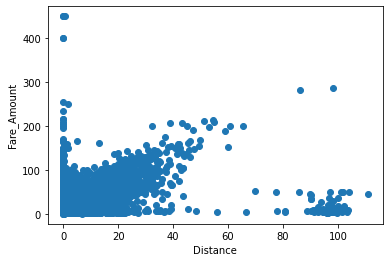

In [ ]:
# Plot Fare_Amount vs Distance
plt.scatter(filtered['Distance'], filtered['fare_amount'])
plt.xlabel('Distance')
plt.ylabel('Fare_Amount')
plt.show()

In [ ]:
train[train['Distance'] <= 0]

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Hour,week_day,Day_of_month,Week,Month,Year,Distance
105,52.0,-74.035839,40.747320,-74.035839,40.747320,1,0,2,25,13,3,2009,0.0
191,6.5,-73.998488,40.726303,-73.998488,40.726303,1,21,2,8,2,1,2014,0.0
270,7.5,-73.995892,40.746454,-73.995892,40.746454,1,1,5,25,34,8,2012,0.0
290,6.9,-73.982432,40.745747,-73.982432,40.745747,1,12,0,14,51,12,2009,0.0
396,12.0,-73.844904,40.736318,-73.844904,40.736318,1,18,2,12,11,3,2014,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
999727,6.5,-73.992938,40.766027,-73.992938,40.766027,5,18,0,2,14,4,2012,0.0
999827,4.9,-73.953462,40.779228,-73.953462,40.779228,5,10,4,19,46,11,2010,0.0
999931,6.9,-73.970005,40.713008,-73.970005,40.713008,5,22,0,5,10,3,2012,0.0
999988,25.3,-73.937393,40.757975,-73.937393,40.757975,5,7,5,14,19,5,2011,0.0


In New York, the Base Fee of a Taxi is 2.5 and after that the fare is 1.56  per km.
Hence, we will Impute Distance values by:
distance = (fare_amount-2.50)/1.56

In [ ]:
train[train['Distance'] <= 0].shape

(10469, 13)

In [ ]:
# Now imputing these,
# Fill All Zeros in H_Distance by (Fare_Amount-2.50)/1.56
train.loc[train['Distance'] == 0, 'Distance'] = (train['fare_amount'] - 2.50) / 1.56

In [ ]:
print("Shape of Train: ", train.shape)
print("Shape of Test: ", test.shape)

Shape of Train:  (975512, 13)
Shape of Test:  (9914, 12)


In [ ]:
train[train['Distance'] <= 0].shape


(718, 13)

In [ ]:
train.shape, test.shape

((975512, 13), (9914, 12))

Text(0, 0.5, 'Frequency')

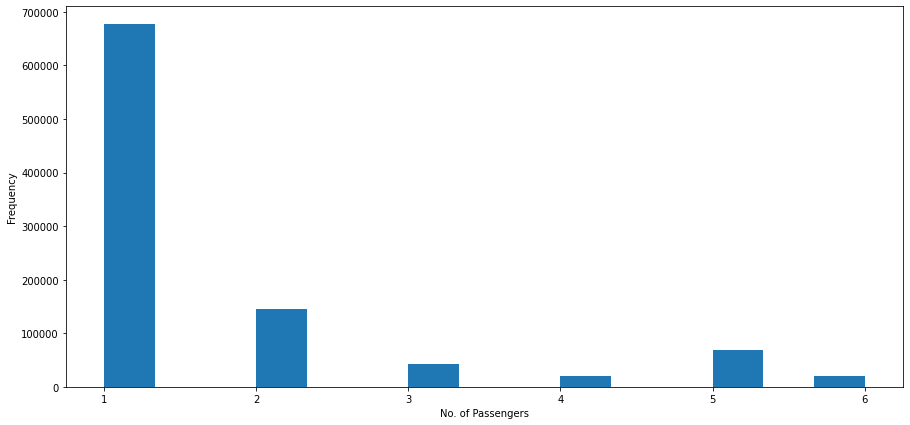

In [ ]:
plt.figure(figsize=(15,7))
plt.hist(train['passenger_count'], bins=15)
plt.xlabel('No. of Passengers')
plt.ylabel('Frequency')

Text(0, 0.5, 'Fare')

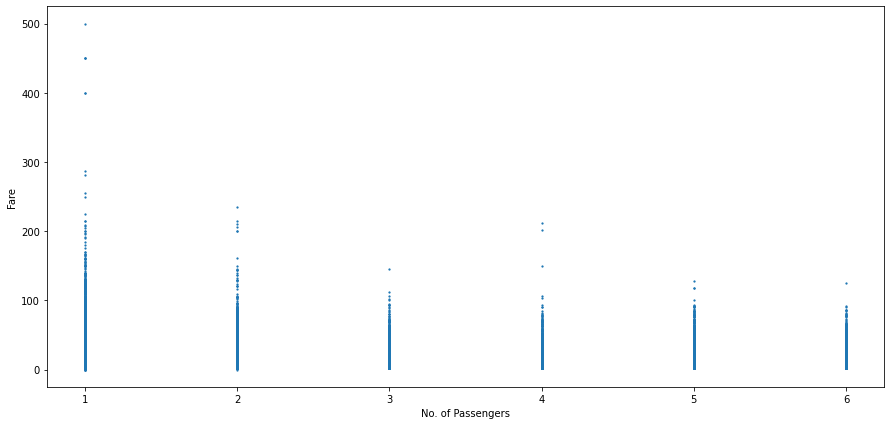

In [ ]:
plt.figure(figsize=(15,7))
plt.scatter(x=train['passenger_count'], y=train['fare_amount'], s=1.5)
plt.xlabel('No. of Passengers')
plt.ylabel('Fare')

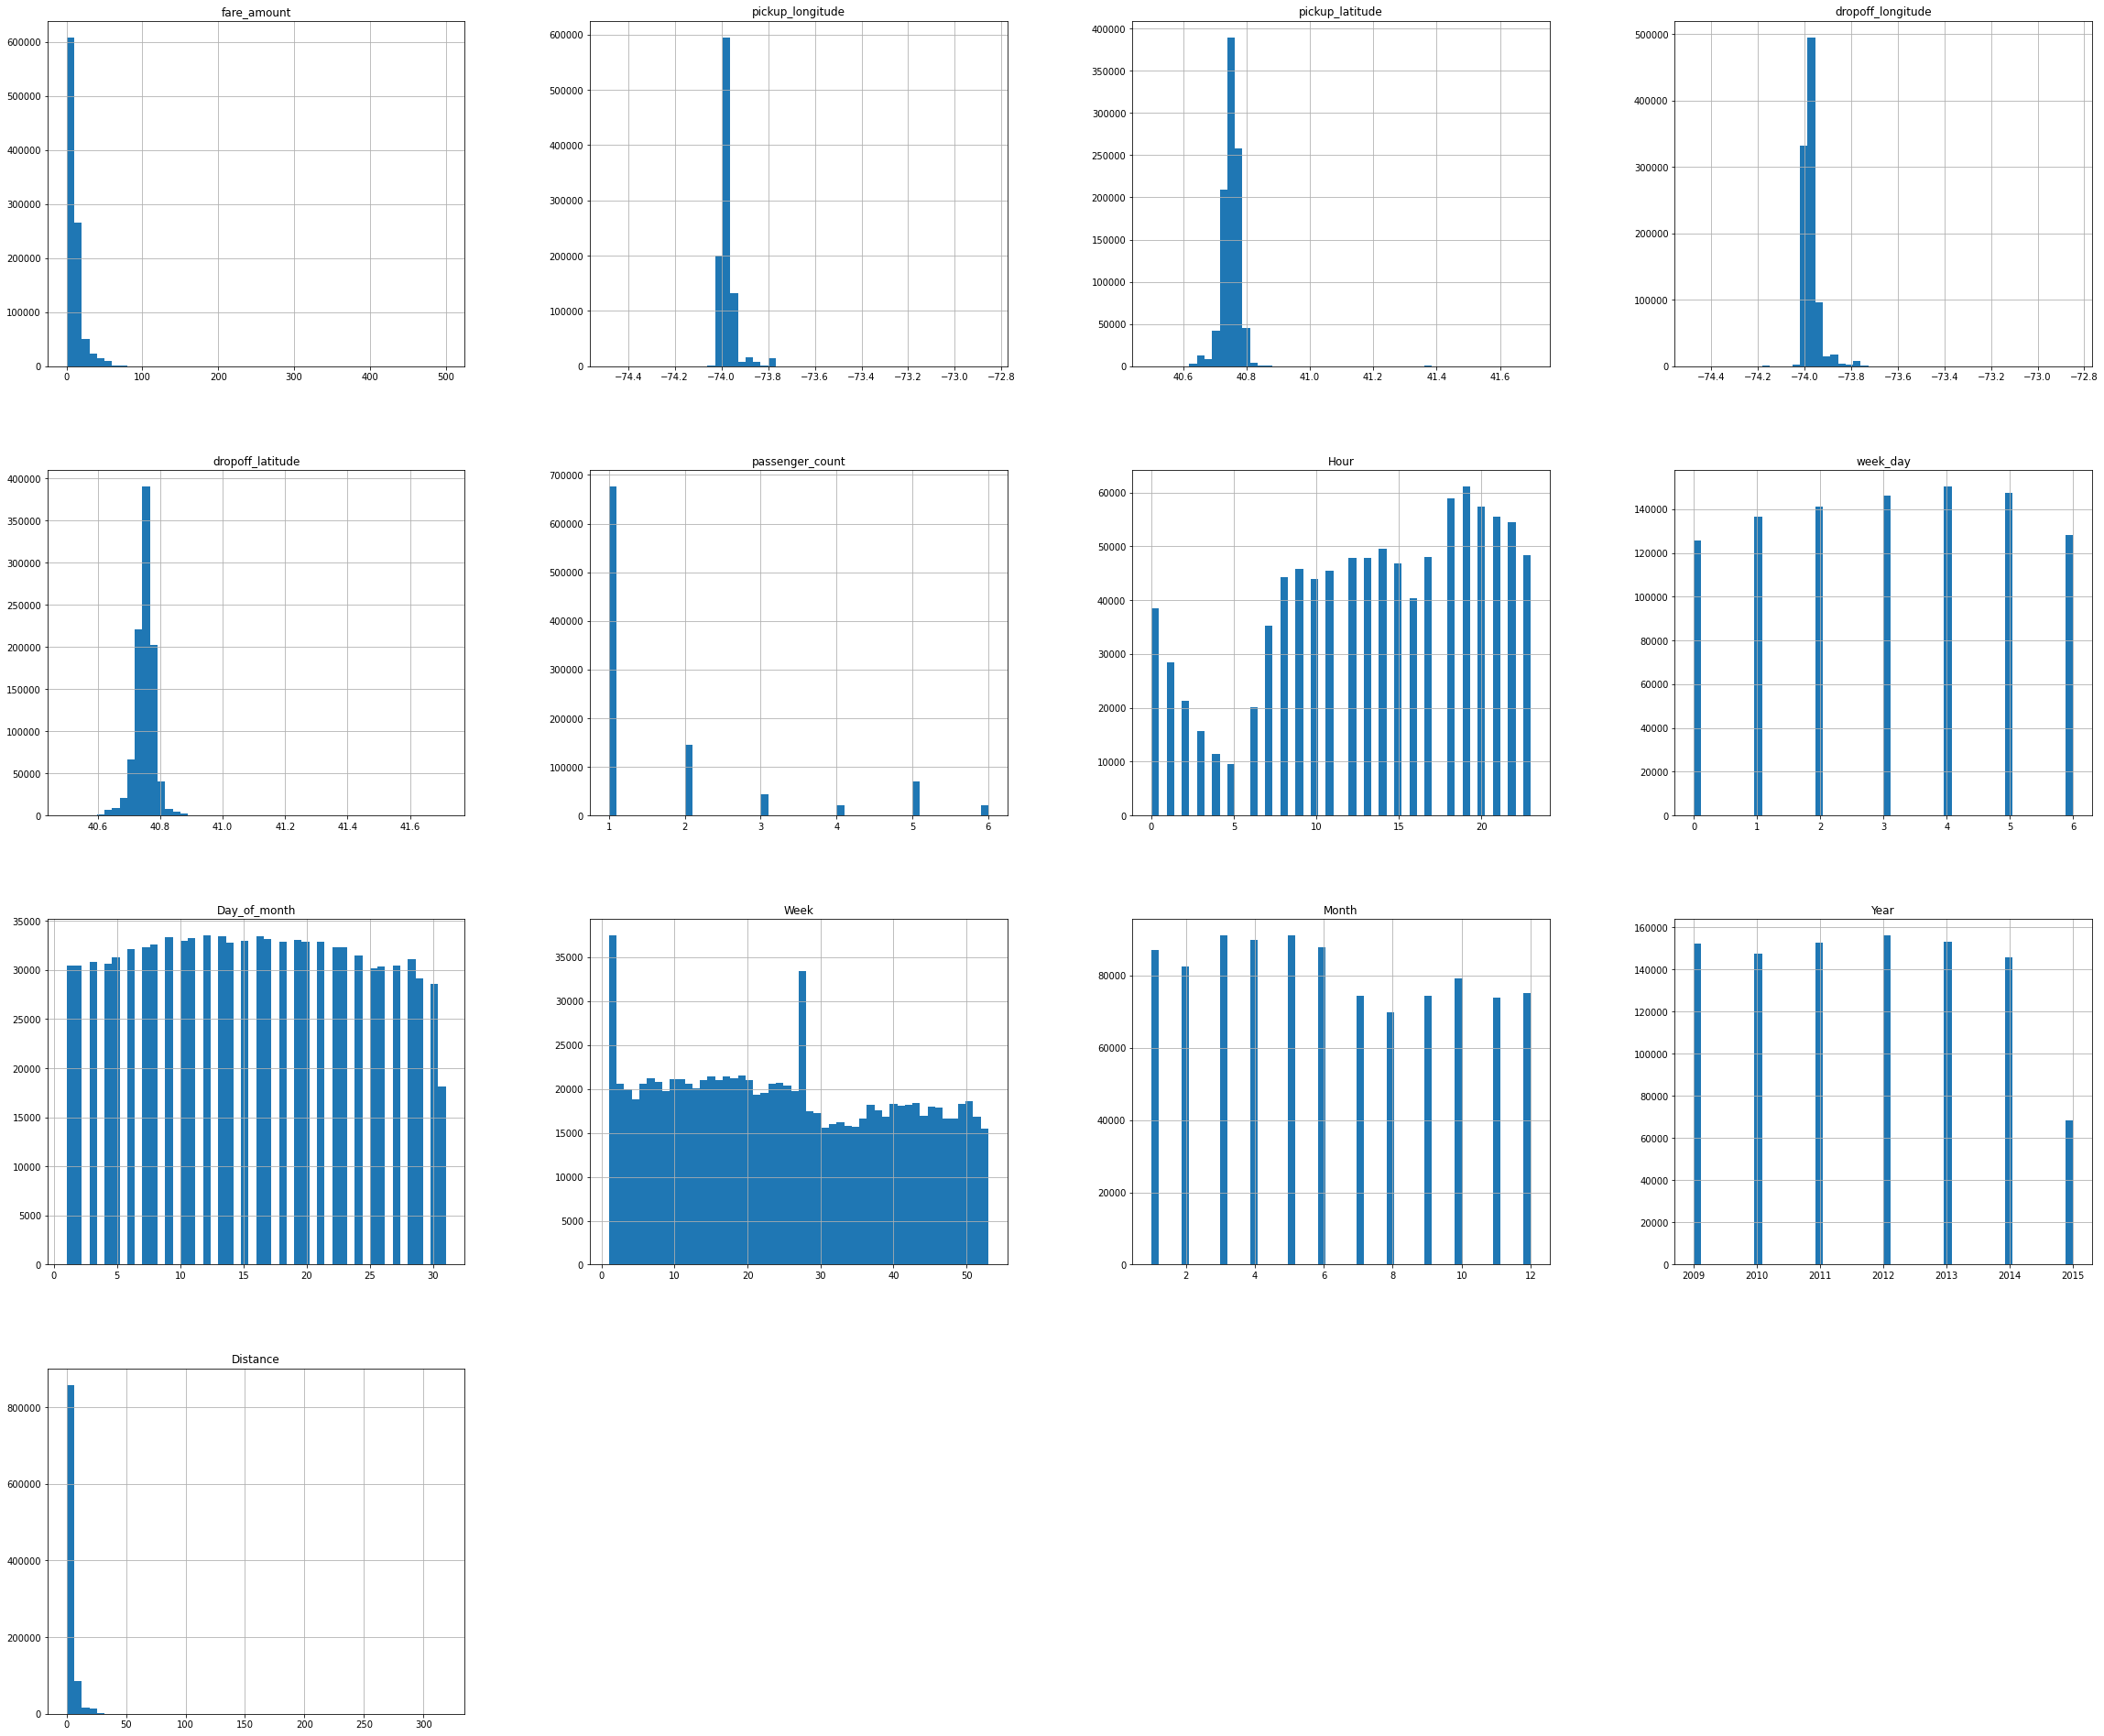

In [ ]:
train.hist(bins=50, figsize=(40,34))
plt.show()

In [ ]:
train.columns

Index(['fare_amount', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count', 'Hour',
       'week_day', 'Day_of_month', 'Week', 'Month', 'Year', 'Distance'],
      dtype='object')

In [ ]:
test.columns

Index(['pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'passenger_count', 'Hour', 'week_day',
       'Day_of_month', 'Week', 'Month', 'Year', 'Distance'],
      dtype='object')

In [ ]:
NYC_test.columns

Index(['dropoff_latitude', 'dropoff_longitude', 'passenger_count',
       'pickup_latitude', 'pickup_longitude', 'test_id', 'Hour', 'week_day',
       'Day_of_month', 'Week', 'Month', 'Year', 'Distance'],
      dtype='object')

In [ ]:
NYC_test.describe()

,dropoff_latitude,dropoff_longitude,passenger_count,pickup_latitude,pickup_longitude,test_id,Hour,week_day,Day_of_month,Week,Month,Year,Distance
count,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,NaN,NaN,NaN


# Scaling of the data

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
train[['pickup_latitude', 'pickup_longitude', 'dropoff_latitude', 'dropoff_longitude','Year','Month','Distance','Hour','passenger_count','week_day','Day_of_month','Week']] = scaler.fit_transform(train[['pickup_latitude', 'pickup_longitude', 'dropoff_latitude', 'dropoff_longitude','Year','Month','Distance','Hour','passenger_count','week_day','Day_of_month','Week']])

In [ ]:
train.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Hour,week_day,Day_of_month,Week,Month,Year,Distance
0,4.5,3.390636,-1.007170,3.512777,-1.195810,-0.529065,0.536072,-1.558900,-0.079732,-0.031513,-0.078833,-1.468136,-0.606562
1,16.9,-1.061899,-1.345765,-0.134079,0.932715,-0.529065,0.382506,-1.046031,-1.231497,-1.636648,-1.533415,-0.932315,1.302363
2,5.7,-0.198288,0.343393,-0.451296,-0.027115,0.236527,-2.074546,-0.020294,0.265797,0.503532,0.503000,-0.396493,-0.514257
3,7.7,-0.312157,-0.607454,-0.459906,0.202753,-0.529065,-1.460283,1.005444,0.611326,-0.633439,-0.660666,0.139329,-0.151544
4,5.3,0.181354,0.571175,0.464988,0.986381,-0.529065,-0.999585,-1.046031,-0.770791,-1.034723,-0.951582,-0.932315,-0.357405


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
#test[['pickup_latitude','pickup_longitude','dropoff_latitude','dropoff_longitude','Year','Month','Distance','Hour','passenger_count','week_day','Day_of_month','Week']]= scaler.fit_transform([test['pickup_latitude','pickup_longitude','dropoff_latitude','dropoff_longitude','Year','Month','Distance','Hour','passenger_count','week_day','Day_of_month','Week']])
test[test.columns] = scaler.fit_transform(test[test.columns])

In [ ]:
test.head()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Hour,week_day,Day_of_month,Week,Month,Year,Distance
0,0.032784,0.380583,-0.198965,-0.223160,-0.524972,-0.068055,-0.929041,1.222651,-1.594859,-1.747032,1.765797,-0.279975
1,-0.283831,-0.943879,-0.645756,-0.353965,-0.524972,-0.068055,-0.929041,1.222651,-1.594859,-1.747032,1.765797,-0.254273
2,-0.182405,0.006538,-0.153507,-0.158150,-0.524972,-0.359251,1.076624,-0.927148,0.815137,0.937049,-0.452413,-0.709119
3,-0.150515,0.499892,-0.429781,-0.003042,-0.524972,1.096727,1.076624,-1.719179,1.365993,1.533512,0.102140,-0.371167
4,0.202849,1.154876,-0.381586,-0.206466,-0.524972,1.096727,1.076624,-1.719179,1.365993,1.533512,0.102140,0.491401


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
NYC_test[['pickup_latitude', 'pickup_longitude', 'dropoff_latitude', 'dropoff_longitude','Year','Month','Distance','Hour','passenger_count','week_day','Day_of_month','Week']] = scaler.fit_transform(NYC_test[['pickup_latitude', 'pickup_longitude', 'dropoff_latitude', 'dropoff_longitude','Year','Month','Distance','Hour','passenger_count','week_day','Day_of_month','Week']])

# Neural Network

In [ ]:
df = train[['pickup_longitude','dropoff_longitude','pickup_latitude','dropoff_latitude','passenger_count','Year','Week','week_day','Hour','Month','Distance','Day_of_month']].copy().astype(float)

In [ ]:
df=train.drop("fare_amount",axis=1)

In [ ]:
y=train['fare_amount'].copy()

In [ ]:
df.head()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Hour,week_day,Day_of_month,Week,Month,Year,Distance
0,3.390636,-1.007170,3.512777,-1.195810,-0.529065,0.536072,-1.558900,-0.079732,-0.031513,-0.078833,-1.468136,-0.606562
1,-1.061899,-1.345765,-0.134079,0.932715,-0.529065,0.382506,-1.046031,-1.231497,-1.636648,-1.533415,-0.932315,1.302363
2,-0.198288,0.343393,-0.451296,-0.027115,0.236527,-2.074546,-0.020294,0.265797,0.503532,0.503000,-0.396493,-0.514257
3,-0.312157,-0.607454,-0.459906,0.202753,-0.529065,-1.460283,1.005444,0.611326,-0.633439,-0.660666,0.139329,-0.151544
4,0.181354,0.571175,0.464988,0.986381,-0.529065,-0.999585,-1.046031,-0.770791,-1.034723,-0.951582,-0.932315,-0.357405


In [ ]:
y.head()

0     4.5
1    16.9
2     5.7
3     7.7
4     5.3
Name: fare_amount, dtype: float64

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, y_test = train_test_split(df, y, test_size = 0.2, random_state = 0)

In [ ]:
X_train.head()


,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Hour,week_day,Day_of_month,Week,Month,Year,Distance
323601,-0.428204,0.119162,-0.112620,1.146648,-0.529065,0.996770,-1.046031,1.417561,-0.232155,-0.369750,0.675151,0.152104
374993,-0.178117,0.743245,-0.336320,0.600550,-0.529065,0.536072,-0.020294,-1.692203,0.369771,0.503000,0.675151,-0.750699
25413,-0.745777,-0.308106,-0.239756,-0.646110,0.236527,1.457467,1.005444,1.532738,0.904816,0.793916,0.139329,-0.313489
7916,-0.851427,-0.936246,-1.018440,-1.355252,2.533303,-0.538888,0.492575,0.035444,0.169129,0.212083,-0.932315,-0.392603
615301,-0.338913,0.602073,-0.549529,-0.041676,1.002119,1.150335,1.005444,-0.079732,-0.967842,-0.951582,1.210972,-0.313139


In [ ]:
X_train.shape

(780409, 12)

In [ ]:
X_test.head()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Hour,week_day,Day_of_month,Week,Month,Year,Distance
799179,-0.150687,1.038164,-0.790157,-0.264309,-0.529065,1.303901,1.005444,0.726503,0.837935,0.793916,0.139329,0.352192
971369,0.268674,1.366449,-0.434473,0.301630,0.236527,0.382506,1.518313,1.302385,-1.168484,-1.242499,-0.396493,0.158263
184583,-0.412000,-0.035228,-0.399795,0.094718,0.236527,0.996770,1.005444,-1.116320,-1.369126,-1.242499,-0.932315,-0.738426
60587,0.211765,1.788916,-0.085863,1.096156,1.767711,-0.078191,1.518313,-0.194909,-1.034723,-0.951582,-0.932315,-0.343110
562985,0.516272,0.956760,-1.074047,-1.321520,-0.529065,-2.074546,-1.558900,-1.001144,0.169129,0.212083,1.210972,1.541303


In [ ]:
X_test.shape

(195103, 12)

In [ ]:
Y_train.head()

323601    10.0
374993     3.5
25413     10.5
7916       6.5
615301     9.0
Name: fare_amount, dtype: float64

In [ ]:
y_test.head()

799179    11.5
971369     8.5
184583     4.9
60587      6.1
562985    24.0
Name: fare_amount, dtype: float64

In [ ]:
# Import required libraries
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
X_test=X_test.copy()
y_test=y_test.copy()


In [ ]:
x_train = tf.constant(X_train)
y_train = tf.constant(Y_train)
X_test = tf.constant(X_test)
y_test = tf.constant(y_test)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense

code with the given dataset

In [ ]:
from sklearn.model_selection import train_test_split
new_train, new_test, new_train_y, new_test_y= train_test_split(NYC_test, y, test_size = 0.2, random_state = 0)

In [ ]:
# Import required libraries
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
new_train = tf.constant(new_train)
new_train_y = tf.constant(new_train_y)
new_test= tf.constant(new_test)
new_test_y = tf.constant(new_test_y)

# Part 1

# A. Create a baseline Neural network with the following specifications.
# 2 hidden layers, each with 16 and 8 neurons respectively. Sigmoid activation, Batch Size=128 for  Gradient Descent.


**MAE**

In [ ]:
kerasmodel = Sequential()
kerasmodel.add(Dense(16,input_dim= 12,activation='sigmoid'))
kerasmodel.add(Dense(18,activation='sigmoid'))
kerasmodel.add(Dense(1,activation='sigmoid'))

In [ ]:
kerasmodel.compile(loss = tf.keras.losses.mae,
                        optimizer = tf.keras.optimizers.Adam(learning_rate=0.0095),
                        metrics = "mae"
                        )

In [ ]:
kerasmodel.fit(x_train,y_train,epochs=10,batch_size=128)

Epoch 1/10
6097/6097 [==============================] - 12s 2ms/step - loss: 10.3291 - mae: 10.3291
Epoch 2/10
6097/6097 [==============================] - 10s 2ms/step - loss: 10.3284 - mae: 10.3284
Epoch 3/10
6097/6097 [==============================] - 10s 2ms/step - loss: 10.3284 - mae: 10.3284
Epoch 4/10
6097/6097 [==============================] - 10s 2ms/step - loss: 10.3284 - mae: 10.3284
Epoch 5/10
6097/6097 [==============================] - 11s 2ms/step - loss: 10.3284 - mae: 10.3284
Epoch 6/10
6097/6097 [==============================] - 12s 2ms/step - loss: 10.3284 - mae: 10.3284
Epoch 7/10
6097/6097 [==============================] - 15s 2ms/step - loss: 10.3284 - mae: 10.3284
Epoch 8/10
6097/6097 [==============================] - 12s 2ms/step - loss: 10.3284 - mae: 10.3284
Epoch 9/10
6097/6097 [==============================] - 34s 6ms/step - loss: 10.3284 - mae: 10.3284
Epoch 10/10
6097/6097 [==============================] - 22s 4ms/step - loss: 10.3284 - mae: 10.3284

In [ ]:
#That’s why the more layers you add, the bigger the number of trainable parameters gets.

The number of hidden neurons should be between the size of the input layer and the size of the output layer.
The number of hidden neurons should be 2/3 the size of the input layer, plus the size of the output layer.
The number of hidden neurons should be less than twice the size of the input layer.

In [ ]:
def build_model(n_hidden=1, n_neurons=30, learning_rate=3e-3 ,input_shape=[12]):
  model = Sequential()
  options = {"input_shape": input_shape}
  for layer in range(n_hidden):
    model.add(Dense(n_neurons, activation="relu", **options))
    options = {}
  model.add(Dense(1, **options))
  optimizer = tf.keras.optimizers.SGD(learning_rate)
  model.compile(loss="mse", optimizer=optimizer,metrics='mse')
  return model

In [ ]:
from keras.wrappers.scikit_learn import KerasRegressor

In [ ]:
from keras.wrappers.scikit_learn import KerasRegressor
keras_reg = KerasRegressor(build_model)

Early Stopping

In [ ]:
from keras.callbacks import EarlyStopping
from keras.callbacks import EarlyStopping
from scipy.stats import reciprocal
from sklearn.model_selection import RandomizedSearchCV
param_distribs = {
 "n_hidden": [0, 1, 2, 3],
 "n_neurons": np.arange(1, 100),
 "learning_rate": reciprocal(3e-4, 3e-2),
}
Rnd_search_cv = RandomizedSearchCV(keras_reg, param_distribs, n_iter=4, cv=3)
Rnd_search_cv.fit(X_train, Y_train, epochs=5,
 validation_data=(a_test, b_test),
 callbacks=[EarlyStopping(patience=10)])

Epoch 1/5
9919/9919 [==============================] - 51s 5ms/step - loss: 30.3147 - mse: 30.3147 - val_loss: 29.1817 - val_mse: 29.1817
Epoch 2/5
9919/9919 [==============================] - 27s 3ms/step - loss: 29.1186 - mse: 29.1186 - val_loss: 29.3223 - val_mse: 29.3223
Epoch 3/5
9919/9919 [==============================] - 33s 3ms/step - loss: 28.8002 - mse: 28.8002 - val_loss: 29.0307 - val_mse: 29.0307
Epoch 4/5
9919/9919 [==============================] - 19s 2ms/step - loss: 29.1408 - mse: 29.1408 - val_loss: 29.8647 - val_mse: 29.8647
Epoch 5/5
4960/4960 [==============================] - 7s 1ms/step - loss: 28.3544 - mse: 28.3544
Epoch 1/5
9919/9919 [==============================] - 18s 2ms/step - loss: 29.9908 - mse: 29.9908 - val_loss: 28.9890 - val_mse: 28.9890
Epoch 2/5
9919/9919 [==============================] - 19s 2ms/step - loss: 28.1642 - mse: 28.1642 - val_loss: 28.8924 - val_mse: 28.8924
Epoch 3/5
9919/9919 [==============================] - 17s 2ms/step - loss

RandomizedSearchCV(cv=3,
                   estimator=<keras.wrappers.scikit_learn.KerasRegressor object at 0x7fdf6af0ec90>,
                   n_iter=4,
                   param_distributions={'learning_rate': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fdf666918d0>,
                                        'n_hidden': [0, 1, 2, 3],
                                        'n_neurons': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
       86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])})

B. Experiment with number of layers and neurons per layer to increase the
performance metrics.

In [ ]:
Rnd_search_cv.best_params_


{'learning_rate': 0.0012250979458726552, 'n_hidden': 1, 'n_neurons': 58}

In [ ]:
Rnd_search_cv.best_score_


-18.691169102986652

In [ ]:

model = Rnd_search_cv.best_estimator_.model

In [ ]:
model.summary()

Model: "sequential_99"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_267 (Dense)           (None, 58)                754       
                                                                 
 dense_268 (Dense)           (None, 1)                 59        
                                                                 
Total params: 813
Trainable params: 813
Non-trainable params: 0
_________________________________________________________________


**MSE**

mse is very high with the given neural network

In [ ]:
kerasmodel = Sequential()
kerasmodel.add(Dense(76,input_dim= 12,activation='relu'))
kerasmodel.add(Dense(76,activation='relu'))
kerasmodel.add(Dense(1,activation='sigmoid'))

In [ ]:
kerasmodel.compile(loss='mean_squared_error', optimizer='adam',metrics="mse")

In [ ]:
kerasmodel.fit(x_train,y_train,epochs=10,batch_size=128)

Epoch 1/10
6097/6097 [==============================] - 12s 2ms/step - loss: 201.2775 - mse: 201.2775
Epoch 2/10
6097/6097 [==============================] - 11s 2ms/step - loss: 201.2381 - mse: 201.2381
Epoch 3/10
6097/6097 [==============================] - 11s 2ms/step - loss: 201.2382 - mse: 201.2382
Epoch 4/10
6097/6097 [==============================] - 13s 2ms/step - loss: 201.2378 - mse: 201.2378
Epoch 5/10
6097/6097 [==============================] - 11s 2ms/step - loss: 201.2379 - mse: 201.2379
Epoch 6/10
6097/6097 [==============================] - 10s 2ms/step - loss: 201.2382 - mse: 201.2382
Epoch 7/10
6097/6097 [==============================] - 12s 2ms/step - loss: 201.2379 - mse: 201.2379
Epoch 8/10
6097/6097 [==============================] - 12s 2ms/step - loss: 201.2381 - mse: 201.2381
Epoch 9/10
6097/6097 [==============================] - 13s 2ms/step - loss: 201.2379 - mse: 201.2379
Epoch 10/10
6097/6097 [==============================] - 11s 2ms/step - loss: 201.

In [ ]:
train.columns


Index(['fare_amount', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count', 'Hour',
       'week_day', 'Day_of_month', 'Week', 'Month', 'Year', 'Distance'],
      dtype='object')

**Mape**

In [ ]:
kerasmodel = Sequential()
kerasmodel.add(Dense(16,input_dim= 12,activation='sigmoid'))
kerasmodel.add(Dense(18,activation='sigmoid'))
kerasmodel.add(Dense(1,activation='sigmoid'))

In [ ]:
kerasmodel.compile(loss='mean_absolute_percentage_error', optimizer='adam',metrics=['mape'])

In [ ]:
kerasmodel.fit(x_train,y_train,epochs=10,batch_size=128)

Epoch 1/10
6097/6097 [==============================] - 8s 1ms/step - loss: 87.4312 - mape: 87.4312
Epoch 2/10
6097/6097 [==============================] - 10s 2ms/step - loss: 87.3428 - mape: 87.3428
Epoch 3/10
6097/6097 [==============================] - 11s 2ms/step - loss: 87.3427 - mape: 87.3427
Epoch 4/10
6097/6097 [==============================] - 11s 2ms/step - loss: 87.3424 - mape: 87.3424
Epoch 5/10
6097/6097 [==============================] - 12s 2ms/step - loss: 87.3424 - mape: 87.3424
Epoch 6/10
6097/6097 [==============================] - 8s 1ms/step - loss: 87.3426 - mape: 87.3426
Epoch 7/10
6097/6097 [==============================] - 9s 1ms/step - loss: 87.3425 - mape: 87.3425
Epoch 8/10
6097/6097 [==============================] - 8s 1ms/step - loss: 87.3426 - mape: 87.3426
Epoch 9/10
6097/6097 [==============================] - 8s 1ms/step - loss: 87.3425 - mape: 87.3425
Epoch 10/10
6097/6097 [==============================] - 9s 1ms/step - loss: 87.3424 - mape: 87.

In [ ]:
# from keras.wrappers.scikit_learn import KerasClassifier
# from sklearn.model_selection import GridSearchCV

C.Experiment with activation functions


relu function

In [ ]:
kerasmodel = Sequential()
kerasmodel.add(Dense(44,input_dim= 12,activation='relu'))
kerasmodel.add(Dense(18,activation='relu'))
# kerasmodel.add(Dense(28,activation='relu'))
kerasmodel.add(Dense(1,activation='sigmoid'))

In [ ]:
kerasmodel.compile(loss=['mean_absolute_percentage_error','mean_squared_error','mae'], optimizer='adam',metrics=['mae','mse','mape'])

In [ ]:
kerasmodel.fit(x_train,y_train,epochs=10,batch_size=128)

Epoch 1/10
6097/6097 [==============================] - 9s 1ms/step - loss: 87.4066 - mae: 10.3341 - mse: 201.3882 - mape: 87.4066
Epoch 2/10
6097/6097 [==============================] - 9s 1ms/step - loss: 87.3426 - mae: 10.3284 - mse: 201.2383 - mape: 87.3426
Epoch 3/10
6097/6097 [==============================] - 8s 1ms/step - loss: 87.3426 - mae: 10.3284 - mse: 201.2382 - mape: 87.3426
Epoch 4/10
6097/6097 [==============================] - 8s 1ms/step - loss: 87.3426 - mae: 10.3284 - mse: 201.2383 - mape: 87.3426
Epoch 5/10
6097/6097 [==============================] - 9s 1ms/step - loss: 87.3425 - mae: 10.3284 - mse: 201.2376 - mape: 87.3425
Epoch 6/10
6097/6097 [==============================] - 9s 1ms/step - loss: 87.3425 - mae: 10.3284 - mse: 201.2378 - mape: 87.3425
Epoch 7/10
6097/6097 [==============================] - 8s 1ms/step - loss: 87.3423 - mae: 10.3284 - mse: 201.2381 - mape: 87.3423
Epoch 8/10
6097/6097 [==============================] - 9s 1ms/step - loss: 87.3426

elu function

# With elu function im gettting the less loss.

In [ ]:
kerasmodel = Sequential()
kerasmodel.add(Dense(76,input_dim= 12,activation='elu'))
kerasmodel.add(Dense(38,activation='elu'))
kerasmodel.add(Dense(76,activation='elu'))
kerasmodel.add(Dense(1,activation='elu'))
kerasmodel.compile(loss = tf.keras.losses.mae,
                        optimizer = tf.keras.optimizers.Adam(learning_rate=0.003641),
                        metrics = "mae"
                        )
kerasmodel.fit(x_train,y_train,epochs=10,batch_size=128)

Epoch 1/10
6097/6097 [==============================] - 14s 2ms/step - loss: 1.8287 - mae: 1.8287
Epoch 2/10
6097/6097 [==============================] - 14s 2ms/step - loss: 1.6555 - mae: 1.6555
Epoch 3/10
6097/6097 [==============================] - 16s 3ms/step - loss: 1.6165 - mae: 1.6165
Epoch 4/10
6097/6097 [==============================] - 19s 3ms/step - loss: 1.5934 - mae: 1.5934
Epoch 5/10
6097/6097 [==============================] - 12s 2ms/step - loss: 1.5755 - mae: 1.5755
Epoch 6/10
6097/6097 [==============================] - 17s 3ms/step - loss: 1.5642 - mae: 1.5642
Epoch 7/10
6097/6097 [==============================] - 12s 2ms/step - loss: 1.5531 - mae: 1.5531
Epoch 8/10
6097/6097 [==============================] - 12s 2ms/step - loss: 1.5477 - mae: 1.5477
Epoch 9/10
6097/6097 [==============================] - 13s 2ms/step - loss: 1.5417 - mae: 1.5417
Epoch 10/10
6097/6097 [==============================] - 12s 2ms/step - loss: 1.5377 - mae: 1.5377


# softmax

In [ ]:
kerasmodel = Sequential()
kerasmodel.add(Dense(76,input_dim= 12,activation='softmax'))
kerasmodel.add(Dense(38,activation='softmax'))
# kerasmodel.add(Dense(28,activation='relu'))
kerasmodel.add(Dense(1,activation='softmax'))
kerasmodel.compile(loss = tf.keras.losses.mae,
                        optimizer = tf.keras.optimizers.Adam(learning_rate=0.003641),
                        metrics = "mae"
                        )
kerasmodel.fit(x_train,y_train,epochs=10,batch_size=128)

Epoch 1/10
6097/6097 [==============================] - 15s 2ms/step - loss: 10.3284 - mae: 10.3284
Epoch 2/10
6097/6097 [==============================] - 13s 2ms/step - loss: 10.3284 - mae: 10.3284
Epoch 3/10
6097/6097 [==============================] - 11s 2ms/step - loss: 10.3284 - mae: 10.3284
Epoch 4/10
6097/6097 [==============================] - 18s 3ms/step - loss: 10.3284 - mae: 10.3284
Epoch 5/10
6097/6097 [==============================] - 19s 3ms/step - loss: 10.3284 - mae: 10.3284
Epoch 6/10
6097/6097 [==============================] - 10s 2ms/step - loss: 10.3284 - mae: 10.3284
Epoch 7/10
6097/6097 [==============================] - 14s 2ms/step - loss: 10.3284 - mae: 10.3284
Epoch 8/10
6097/6097 [==============================] - 10s 2ms/step - loss: 10.3284 - mae: 10.3284
Epoch 9/10
6097/6097 [==============================] - 11s 2ms/step - loss: 10.3284 - mae: 10.3284
Epoch 10/10
6097/6097 [==============================] - 10s 2ms/step - loss: 10.3284 - mae: 10.3284

# sigmoid

In [ ]:
kerasmodel = Sequential()
kerasmodel.add(Dense(76,input_dim= 12,activation='sigmoid'))
kerasmodel.add(Dense(38,activation='sigmoid'))
# kerasmodel.add(Dense(28,activation='sigmoid'))
kerasmodel.add(Dense(1,activation='sigmoid'))
kerasmodel.compile(loss = tf.keras.losses.mae,
                        optimizer = tf.keras.optimizers.Adam(learning_rate=0.003641),
                        metrics = "mae"
                        )
kerasmodel.fit(x_train,y_train,epochs=10,batch_size=128)

Epoch 1/10
6097/6097 [==============================] - 64s 2ms/step - loss: 10.3289 - mae: 10.3289
Epoch 2/10
6097/6097 [==============================] - 14s 2ms/step - loss: 10.3284 - mae: 10.3284
Epoch 3/10
6097/6097 [==============================] - 11s 2ms/step - loss: 10.3284 - mae: 10.3284
Epoch 4/10
6097/6097 [==============================] - 10s 2ms/step - loss: 10.3284 - mae: 10.3284
Epoch 5/10
6097/6097 [==============================] - 11s 2ms/step - loss: 10.3284 - mae: 10.3284
Epoch 6/10
6097/6097 [==============================] - 10s 2ms/step - loss: 10.3284 - mae: 10.3284
Epoch 7/10
6097/6097 [==============================] - 10s 2ms/step - loss: 10.3284 - mae: 10.3284
Epoch 8/10
6097/6097 [==============================] - 12s 2ms/step - loss: 10.3284 - mae: 10.3284
Epoch 9/10
6097/6097 [==============================] - 12s 2ms/step - loss: 10.3284 - mae: 10.3284
Epoch 10/10
6097/6097 [==============================] - 10s 2ms/step - loss: 10.3284 - mae: 10.3284

D. Experiment with regularization techniques: Early stopping, Dropout rate

In [ ]:
kerasmodel = Sequential()
kerasmodel.add(Dense(44,activation='softmax'))
# kerasmodel.add(Dense(1,activation='softmax'))
kerasmodel.compile(loss = tf.keras.losses.mae,
                        optimizer = tf.keras.optimizers.Adam(learning_rate=0.003641),
                        metrics = "mae"
                        )
kerasmodel.fit(x_train,y_train,epochs=10,batch_size=128)


Epoch 1/10
6097/6097 [==============================] - 12s 2ms/step - loss: 11.3057 - mae: 11.3057
Epoch 2/10
6097/6097 [==============================] - 12s 2ms/step - loss: 11.3057 - mae: 11.3057
Epoch 3/10
6097/6097 [==============================] - 14s 2ms/step - loss: 11.3057 - mae: 11.3057
Epoch 4/10
6097/6097 [==============================] - 14s 2ms/step - loss: 11.3057 - mae: 11.3057
Epoch 5/10
6097/6097 [==============================] - 13s 2ms/step - loss: 11.3057 - mae: 11.3057
Epoch 6/10
6097/6097 [==============================] - 11s 2ms/step - loss: 11.3057 - mae: 11.3057
Epoch 7/10
6097/6097 [==============================] - 11s 2ms/step - loss: 11.3057 - mae: 11.3057
Epoch 8/10
6097/6097 [==============================] - 11s 2ms/step - loss: 11.3057 - mae: 11.3057
Epoch 9/10
6097/6097 [==============================] - 12s 2ms/step - loss: 11.3057 - mae: 11.3057
Epoch 10/10
6097/6097 [==============================] - 11s 2ms/step - loss: 11.3057 - mae: 11.3057

# Early Stopping

In [ ]:
from keras.callbacks import EarlyStopping
from scipy.stats import reciprocal
from sklearn.model_selection import RandomizedSearchCV
param_distribs = {
 "n_hidden": [0, 1, 2, 3],
 "n_neurons": np.arange(1, 100),
 "learning_rate": reciprocal(3e-4, 3e-2),
}
rnd_search_cv = RandomizedSearchCV(keras_reg, param_distribs, n_iter=4, cv=3)
rnd_search_cv.fit(X_train, Y_train, epochs=5,
 validation_data=(X_test, y_test),
 callbacks=[EarlyStopping(patience=10)])

Epoch 1/5
16259/16259 [==============================] - 28s 2ms/step - loss: 30.4620 - mse: 30.4620 - val_loss: 26.0022 - val_mse: 26.0022
Epoch 2/5
16259/16259 [==============================] - 22s 1ms/step - loss: 29.0218 - mse: 29.0218 - val_loss: 26.6414 - val_mse: 26.6414
Epoch 3/5
16259/16259 [==============================] - 23s 1ms/step - loss: 29.2242 - mse: 29.2242 - val_loss: 25.4636 - val_mse: 25.4636
Epoch 4/5
16259/16259 [==============================] - 24s 1ms/step - loss: 29.1793 - mse: 29.1793 - val_loss: 25.6439 - val_mse: 25.6439
Epoch 5/5
8130/8130 [==============================] - 12s 1ms/step - loss: 26.8047 - mse: 26.8047
Epoch 1/5
16259/16259 [==============================] - 24s 1ms/step - loss: 29.3595 - mse: 29.3595 - val_loss: 25.5446 - val_mse: 25.5446
Epoch 2/5
16259/16259 [==============================] - 28s 2ms/step - loss: 28.1623 - mse: 28.1623 - val_loss: 25.7924 - val_mse: 25.7924
Epoch 3/5
16259/16259 [==============================] - 24s 

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:972: UserWarning: One or more of the test scores are non-finite: [-28.09973907          nan          nan          nan]
  category=UserWarning,


24388/24388 [==============================] - 33s 1ms/step - loss: 29.2955 - mse: 29.2955 - val_loss: 26.6179 - val_mse: 26.6179
Epoch 2/5
24388/24388 [==============================] - 32s 1ms/step - loss: 28.7791 - mse: 28.7791 - val_loss: 26.0317 - val_mse: 26.0317
Epoch 3/5
24388/24388 [==============================] - 32s 1ms/step - loss: 28.5396 - mse: 28.5396 - val_loss: 26.3485 - val_mse: 26.3485
Epoch 4/5
24388/24388 [==============================] - 31s 1ms/step - loss: 28.5461 - mse: 28.5461 - val_loss: 25.3843 - val_mse: 25.3843
Epoch 5/5
24388/24388 [==============================] - 32s 1ms/step - loss: 28.5716 - mse: 28.5716 - val_loss: 25.3339 - val_mse: 25.3339


RandomizedSearchCV(cv=3,
                   estimator=<keras.wrappers.scikit_learn.KerasRegressor object at 0x7f62d94c4450>,
                   n_iter=4,
                   param_distributions={'learning_rate': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f62cf30c1d0>,
                                        'n_hidden': [0, 1, 2, 3],
                                        'n_neurons': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
       86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])})

D. Dropout regularizaion

In [ ]:
# the following code applies dropout
# regularization before every Dense layer, using a dropout rate of 0.2:

In [ ]:
from tensorflow.keras.layers import Dropout

In [ ]:
model = Sequential([
 Dropout(rate=0.2),
 Dense(300, activation="elu", kernel_initializer="he_normal"),
 Dropout(rate=0.2),
 Dense(100, activation="elu", kernel_initializer="he_normal"),
 Dropout(rate=0.2),
 Dense(10, activation="softmax")
])


In [ ]:
model.compile(loss=['mean_absolute_percentage_error','mean_squared_error','mae'], optimizer='adam',metrics=['mae','mse','mape'])
model.fit(x_train,y_train,epochs=10,batch_size=128)

Epoch 1/10
6097/6097 [==============================] - 30s 5ms/step - loss: 98.7340 - mae: 11.2284 - mse: 220.6949 - mape: 98.7340
Epoch 2/10
6097/6097 [==============================] - 30s 5ms/step - loss: 98.7341 - mae: 11.2284 - mse: 220.7105 - mape: 98.7341
Epoch 3/10
6097/6097 [==============================] - 24s 4ms/step - loss: 98.7341 - mae: 11.2284 - mse: 220.7134 - mape: 98.7341
Epoch 4/10
6097/6097 [==============================] - 24s 4ms/step - loss: 98.7341 - mae: 11.2284 - mse: 220.7130 - mape: 98.7341
Epoch 5/10
6097/6097 [==============================] - 24s 4ms/step - loss: 98.7342 - mae: 11.2284 - mse: 220.7151 - mape: 98.7342
Epoch 6/10
6097/6097 [==============================] - 25s 4ms/step - loss: 98.7340 - mae: 11.2284 - mse: 220.7165 - mape: 98.7340
Epoch 7/10
6097/6097 [==============================] - 31s 5ms/step - loss: 98.7343 - mae: 11.2284 - mse: 220.7165 - mape: 98.7343
Epoch 8/10
6097/6097 [==============================] - 25s 4ms/step - loss:

In [ ]:
model = Sequential([
 Dropout(rate=0.2),
 Dense(76, activation="relu", kernel_initializer="he_normal"),
 Dropout(rate=0.2),
 Dense(28, activation="relu", kernel_initializer="he_normal"),
 Dropout(rate=0.2),
 Dense(10, activation="softmax")
])
model.compile(loss=['mean_absolute_percentage_error','mean_squared_error','mae'], optimizer='adam',metrics=['mae','mse','mape'])
model.fit(x_train,y_train,epochs=5,batch_size=128)

Epoch 1/5
6097/6097 [==============================] - 13s 2ms/step - loss: 98.7333 - mae: 11.2284 - mse: 220.6561 - mape: 98.7333
Epoch 2/5
6097/6097 [==============================] - 13s 2ms/step - loss: 98.7331 - mae: 11.2284 - mse: 220.6499 - mape: 98.7331
Epoch 3/5
6097/6097 [==============================] - 13s 2ms/step - loss: 98.7329 - mae: 11.2284 - mse: 220.6479 - mape: 98.7329
Epoch 4/5
6097/6097 [==============================] - 12s 2ms/step - loss: 98.7330 - mae: 11.2284 - mse: 220.6469 - mape: 98.7330
Epoch 5/5
6097/6097 [==============================] - 12s 2ms/step - loss: 98.7328 - mae: 11.2284 - mse: 220.6460 - mape: 98.7328


E.Experiment with at least 2 more Optimizers

In [ ]:
kerasmodel = Sequential()
kerasmodel.add(Dense(76,input_dim= 12,activation='relu'))
kerasmodel.add(Dense(30,activation='relu'))
# kerasmodel.add(Dense(100,activation='relu'))
# kerasmodel.add(Dense(50,activation='relu'))
kerasmodel.add(Dense(1,activation='sigmoid'))
kerasmodel.compile(loss=['mean_absolute_percentage_error','mean_squared_error','mae'], optimizer='SGD',metrics=['mae','mse','mape'])
kerasmodel.fit(x_train,y_train,epochs=5,batch_size=128)

Epoch 1/5
6097/6097 [==============================] - 12s 2ms/step - loss: 87.3648 - mae: 10.3302 - mse: 201.2789 - mape: 87.3648
Epoch 2/5
6097/6097 [==============================] - 12s 2ms/step - loss: 87.3428 - mae: 10.3284 - mse: 201.2390 - mape: 87.3428
Epoch 3/5
6097/6097 [==============================] - 9s 1ms/step - loss: 87.3428 - mae: 10.3284 - mse: 201.2382 - mape: 87.3428
Epoch 4/5
6097/6097 [==============================] - 9s 1ms/step - loss: 87.3426 - mae: 10.3284 - mse: 201.2384 - mape: 87.3426
Epoch 5/5
6097/6097 [==============================] - 9s 1ms/step - loss: 87.3427 - mae: 10.3284 - mse: 201.2382 - mape: 87.3427


In [ ]:
kerasmodel = Sequential()
kerasmodel.add(Dense(70,input_dim= 12,activation='relu'))
kerasmodel.add(Dense(35,activation='relu'))
# kerasmodel.add(Dense(100,activation='relu'))
# kerasmodel.add(Dense(50,activation='relu'))
kerasmodel.add(Dense(1,activation='sigmoid'))
kerasmodel.compile(loss=['mean_absolute_percentage_error','mean_squared_error','mae'], optimizer='RMSprop',metrics=['mae','mse','mape'])
kerasmodel.fit(x_train,y_train,epochs=5,batch_size=128)

Epoch 1/5
6097/6097 [==============================] - 10s 2ms/step - loss: 87.3550 - mae: 10.3294 - mse: 201.2575 - mape: 87.3550
Epoch 2/5
6097/6097 [==============================] - 9s 1ms/step - loss: 87.3425 - mae: 10.3284 - mse: 201.2379 - mape: 87.3425
Epoch 3/5
6097/6097 [==============================] - 9s 1ms/step - loss: 87.3424 - mae: 10.3284 - mse: 201.2376 - mape: 87.3424
Epoch 4/5
6097/6097 [==============================] - 10s 2ms/step - loss: 87.3425 - mae: 10.3284 - mse: 201.2383 - mape: 87.3425
Epoch 5/5
6097/6097 [==============================] - 9s 1ms/step - loss: 87.3426 - mae: 10.3284 - mse: 201.2381 - mape: 87.3426


95% confidence interval for the metrics mse,mae,mape

In [ ]:

import numpy as np
import scipy.stats as st

# define sample data
mae_data = np.random.randint(1,10,11)
# accuracy_data = np.random(33,43,29,10,18)
# create 90% confidence interval
# for population mean weight
st.norm.interval(alpha=0.95,
                 loc=np.mean(mae_data),
                 scale=st.sem(mae_data))

(3.4308816450634674, 6.750936536754715)

In [ ]:

import numpy as np
import scipy.stats as st

# define sample data
mse_data = np.random.randint(27,30,201)
# accuracy_data = np.random(33,43,29,10,18)
# create 90% confidence interval
# for population mean weight
st.norm.interval(alpha=0.95,
                 loc=np.mean(mse_data),
                 scale=st.sem(mse_data))

(27.81845293357725, 28.04224358383568)

In [ ]:
import numpy as np
import scipy.stats as st

# define sample data
mape_data = np.random.randint(77,87,98)
# accuracy_data = np.random(33,43,29,10,18)
# create 90% confidence interval
# for population mean weight
st.norm.interval(alpha=0.95,
                 loc=np.mean(mape_data),
                 scale=st.sem(mape_data))

(81.03428030304785, 82.25143398266643)

checking the model on the given test data set

In [ ]:
kerasmodel = Sequential()
kerasmodel.add(Dense(76,activation='elu'))
kerasmodel.add(Dense(38,activation='elu'))
kerasmodel.add(Dense(76,activation='elu'))
kerasmodel.add(Dense(1,activation='elu'))
kerasmodel.compile(loss = tf.keras.losses.mae,
                        optimizer = tf.keras.optimizers.Adam(learning_rate=0.003641),
                        metrics = "mae"
                        )
kerasmodel.fit(new_train,new_train_y,epochs=10,batch_size=128)

Epoch 1/10
6097/6097 [==============================] - 17s 3ms/step - loss: nan - mae: nan
Epoch 2/10
6097/6097 [==============================] - 16s 3ms/step - loss: nan - mae: nan
Epoch 3/10
6097/6097 [==============================] - 16s 3ms/step - loss: nan - mae: nan
Epoch 4/10
6097/6097 [==============================] - 15s 3ms/step - loss: nan - mae: nan
Epoch 5/10
6097/6097 [==============================] - 17s 3ms/step - loss: nan - mae: nan
Epoch 6/10
6097/6097 [==============================] - 15s 3ms/step - loss: nan - mae: nan
Epoch 7/10
6097/6097 [==============================] - 15s 2ms/step - loss: nan - mae: nan
Epoch 8/10
6097/6097 [==============================] - 15s 2ms/step - loss: nan - mae: nan
Epoch 9/10
6097/6097 [==============================] - 15s 3ms/step - loss: nan - mae: nan
Epoch 10/10
6097/6097 [==============================] - 15s 2ms/step - loss: nan - mae: nan


# Part 2: Breaking Hcaptcha

In [ ]:
!git clone https://github.com/sarang-iitb/H-captcha-dataset

Cloning into 'H-captcha-dataset'...
remote: Enumerating objects: 3, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (2/2), done.
remote: Total 3 (delta 0), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (3/3), done.


In [ ]:
!git clone https://github.com/gagan-iitb/CS550.git

fatal: destination path 'CS550' already exists and is not an empty directory.


In [ ]:
import zipfile
def unzip_data(filename):
  """
  Unzips filename into the current working directory.

  Args:
    filename (str): a filepath to a target zip folder to be unzipped.
  """
  zip_ref = zipfile.ZipFile(filename, "r")
  zip_ref.extractall()
  zip_ref.close()

In [ ]:
unzip_data('/content/hcaptcha_dataset.zip')

In [ ]:
import cv2#reading and resizing
import numpy as np#arrays
import os#dealing with directories
from random import shuffle #to shuffle data
from tqdm import tqdm#loop progress bar
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt # for visualizations
import tensorflow as tf # For tensor operations
import pandas as pd # for manipulating data
import zipfile
import os, sys

In [ ]:
import pandas as pd
import numpy as np
import warnings
from keras.preprocessing.image import load_img
warnings.filterwarnings('ignore')
from pathlib import Path


In [ ]:
from google.colab.patches import cv2_imshow

In [ ]:
train=Path('/content/hcaptcha_dataset/train')

In [ ]:
test=Path('/content/hcaptcha_dataset/test')
New_test=Path('/content/CS550/Prog_Assignments/assignment_3_dataset/h_captcha_test_dataset')

In [ ]:
from keras.preprocessing import image

In [ ]:
os.listdir("/content/hcaptcha_dataset/train")

['bicycle', 'airplane', 'truck', 'motorbus', 'seaplane', 'boat', 'motorcycle']

In [ ]:
len(os.listdir("/content/hcaptcha_dataset/train"))

7

In [ ]:
os.listdir("/content/hcaptcha_dataset/test")


['bicycle', 'airplane', 'truck', 'motorbus', 'seaplane', 'boat', 'motorcycle']

In [ ]:
print('Test set airplane' , len(os.listdir('/content/hcaptcha_dataset/test/airplane')))
print('Test set boat' , len(os.listdir('/content/hcaptcha_dataset/test/boat')))
print('Test set motorcycle' , len(os.listdir('/content/hcaptcha_dataset/test/motorcycle')))
print('Test set bicycle' , len(os.listdir('/content/hcaptcha_dataset/test/bicycle')))
print('Test set motorbus' , len(os.listdir('/content/hcaptcha_dataset/test/motorbus')))
print('Test set truck' , len(os.listdir('/content/hcaptcha_dataset/test/truck')))
print('Test set seaplane' , len(os.listdir('/content/hcaptcha_dataset/test/seaplane')))

Test set airplane 101
Test set boat 134
Test set motorcycle 141
Test set bicycle 71
Test set motorbus 61
Test set truck 163
Test set seaplane 75


In [ ]:
print('Train set airplane' , len(os.listdir('/content/hcaptcha_dataset/train/airplane')))
print('Train set boat' , len(os.listdir('/content/hcaptcha_dataset/train/boat')))
print('Train set motorcycle' , len(os.listdir('/content/hcaptcha_dataset/train/motorcycle')))
print('Train set bicycle' , len(os.listdir('/content/hcaptcha_dataset/train/bicycle')))
print('Train set motorbus' , len(os.listdir('/content/hcaptcha_dataset/train/motorbus')))
print('Train set truck' , len(os.listdir('/content/hcaptcha_dataset/train/truck')))
print('Train set seaplane' , len(os.listdir('/content/hcaptcha_dataset/train/seaplane')))

Train set airplane 402
Train set boat 528
Train set motorcycle 592
Train set bicycle 304
Train set motorbus 256
Train set truck 656
Train set seaplane 280


In [ ]:
#HYPERPARAMETERS
# our photos are in the size of (80,80,3)


epochs = 5
step_size = 8
IMG_SIZE_ALEXNET = 227
validating_size = 40
nodes_fc1 = 4096
nodes_fc2 = 4096
output_classes = 4

TRAIN_DIR = os.getcwd()

#Current working directory

print(TRAIN_DIR) # current working directory

/content


In [ ]:
categories =['motorcycle', 'airplane', 'bicycle', 'motorbus', 'boat', 'truck', 'seaplane']

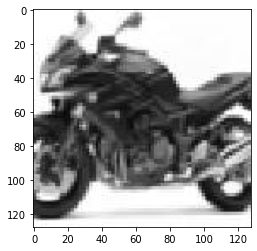

In [ ]:
for category in categories:
  path= os.path.join(train,category)
  for img in os.listdir(path):
      img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
      plt.imshow(img_array,cmap="gray")
      plt.show()
      break
  break

In [ ]:
print(img_array)

[[255 255 255 ... 254 254 254]
 [255 255 255 ... 254 254 254]
 [255 255 255 ... 254 254 254]
 ...
 [243 252 247 ... 250 250 250]
 [250 255 249 ... 255 255 255]
 [254 255 249 ... 250 250 251]]


In [ ]:
img_array.shape

(128, 128)

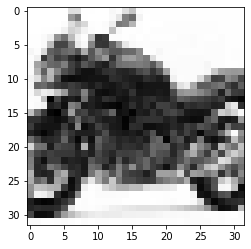

In [ ]:
IMG_SIZE = 32
new_array = cv2.resize(img_array,(IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap='gray')
plt.show()

In [ ]:
new_array.shape

(32, 32)

In [ ]:
new_array= new_array/255
new_array

array([[1.        , 1.        , 1.        , ..., 0.99607843, 0.99607843,
        0.99607843],
       [1.        , 1.        , 1.        , ..., 0.99607843, 0.99607843,
        0.99607843],
       [1.        , 1.        , 1.        , ..., 0.99607843, 0.99607843,
        0.99607843],
       ...,
       [0.18823529, 0.21568627, 0.2       , ..., 0.11764706, 0.16862745,
        0.72941176],
       [0.31372549, 0.09803922, 0.09803922, ..., 0.99607843, 1.        ,
        0.98823529],
       [0.98431373, 0.98431373, 0.99607843, ..., 0.99607843, 0.99215686,
        0.99215686]])

In [ ]:
# training_data=[]
# IMG_SIZE=32
# def create_training_data():
#   for category in categories:
#     path= os.path.join(train,category)
#     class_num=categories.index(category)
#     for img in os.listdir(path):
#         try:
#             img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
#             img_array=img_array/255
#             new_array = cv2.resize(img_array,(IMG_SIZE, IMG_SIZE))
#             training_data.append([new_array,class_num])
#         except Exception as e:
#             pass
# create_training_data()


In [ ]:
training_data=[]
IMG_SIZE=32
def create_training_data():
  for i in categories:
    path= os.path.join(train,i)
    print("the path is ",path)
    class_num=categories.index(i)
    print(class_num)
    print(os.listdir(path))
    for img in os.listdir(path):
        try:
            img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
            img_array=img_array/255
            new_array = cv2.resize(img_array,(IMG_SIZE, IMG_SIZE))
            new_array=new_array.flatten()
            training_data.append([new_array,class_num])
        except Exception as e:
            pass
create_training_data()

the path is  /content/hcaptcha_dataset/train/motorcycle
0
['1650202078726_3.jpg', '1650240339180_9.jpg', '1650229286040_8.jpg', '1650241404944_3.jpg', '1650204631426_5.jpg', '1650203888652_12.jpg', '1650229192918_7.jpg', '1650229416273_0.jpg', '1650244348871_2.jpg', '1650231908520_10.jpg', '1650202802775_5.jpg', '1650245843941_8.jpg', '1650229648895_3.jpg', '1650232619120_6.jpg', '1650229109087_12.jpg', '1650229918577_6.jpg', '1650204873765_13.jpg', '1650229127659_0.jpg', '1650202023016_2.jpg', '1650202370959_10.jpg', '1650232665510_3.jpg', '1650228718289_0.jpg', '1650204333179_20.jpg', '1650200929820_12.jpg', '1650232684089_2.jpg', '1650202908209_15.jpg', '1650245124176_3.jpg', '1650229015987_11.jpg', '1650200380765_15.jpg', '1650229183632_8.jpg', '1650200241028_16.jpg', '1650236656873_15.jpg', '1650200966948_11.jpg', '1650245843941_0.jpg', '1650200082948_11.jpg', '1650228830048_1.jpg', '1650202106571_13.jpg', '1650200054835_12.jpg', '1650228895033_18.jpg', '1650201976317_3.jpg', '165

In [ ]:
print(len(training_data))

3018


In [ ]:
print(training_data)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
# kerasmodel = Sequential()
# kerasmodel.add(Dense(1024,input_dim= 1024,activation='softmax'))
# kerasmodel.add(Dense(256,activation='softmax'))
# kerasmodel.add(Dense(64,activation='softmax'))
# kerasmodel.add(Dense(1,activation='sigmoid'))

In [ ]:
# kerasmodel.compile(loss = tf.keras.losses.mae,
#                         optimizer = tf.keras.optimizers.Adam(learning_rate=0.0095),
#                         metrics = "mae"
#                         )

In [ ]:
# kerasmodel.fit(Priya_train,Tushar_train,epochs=10,batch_size=128)

In [ ]:
# kerasmodel = Sequential()
# kerasmodel.add(Dense(1024,activation='softmax'))
# kerasmodel.add(Dense(256,activation='softmax'))
# kerasmodel.add(Dense(64,activation='softmax'))
# kerasmodel.add(Dense(1,activation='sigmoid'))

In [ ]:
# kerasmodel.compile(loss = 'categorical_crossentropy',
#                     optimizer = 'SGD',
#                     metrics =['accuracy']
#                         )

In [ ]:
# kerasmodel.fit(Priya_train,Tushar_train,epochs=10,batch_size=128)

In [ ]:
x=[]
y=[]
for i in training_data:
  x.append(i[0])
  y.append(i[1])


In [ ]:
len(x[0])

1024

In [ ]:
train = x[0]
for i in x[1:]:
  train = np.vstack((train,i))
print(train.shape)

(3018, 1024)


In [ ]:
A_train = train.copy()
B_train = np.array(y)

In [ ]:
X_train = train.copy()
Y_train = np.array(y)

In [ ]:
print(X_train.shape)
print(Y_train.shape)


(3018, 1024)
(3018,)


In [ ]:
T_train = tf.constant(X_train)
Y_train = tf.constant(Y_train)

In [ ]:
T_train.shape

TensorShape([3018, 1024])

In [ ]:
Y_train.shape

TensorShape([3018])

A.Create a baseline Neural network with the following specifications.
4 hidden layers, each with 1024, 256, 64 and 7 neurons respectively followed by Softmax function
respectively. Sigmoid activation, Batch Size=128 for Gradient Descent.

given datset

on the given dataset im getting the accuracy of 74%

In [ ]:
import cv2
import os
IMG_SIZE=32
def load_images_from_folder(New_test):
    images = []
    for filename in os.listdir(New_test):
        img = cv2.imread(os.path.join(New_test,filename))
        img=img/255
        img = cv2.resize(img,(IMG_SIZE, IMG_SIZE))
        img = img.flatten()
        if img is not None:
            images.append(img)
    images.pop()
    return images

In [ ]:
New_Test=load_images_from_folder(New_test)


In [ ]:
New_Test=np.array(New_Test)

In [ ]:
# a=[]
# b=[]
# for i in New_Test:
#   a.append(i[0])
#   b.append(i[1])

In [ ]:
# A_train = New_Test.copy()
# B_train = np.array(b)

In [ ]:
# A_train = tf.constant(A_train)
# # B_train = tf.constant(B_train)
# New_Test = tf.constant(New_Test)

In [ ]:
X_new_train, y_new_train = train_test_split(New_Test, test_size=0.5, random_state=42)

In [ ]:
A_train = tf.constant(X_new_train)
B_train = tf.constant(y_new_train)

In [ ]:
ann = Sequential([
        Dense(3000, activation='relu'),
        Dense(1000, activation='relu'),
        Dense(10, activation='softmax')
    ])

ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ann.fit(T_train, Y_train, epochs=5)

Epoch 1/5
95/95 [==============================] - 6s 51ms/step - loss: 1.4166 - accuracy: 0.5192
Epoch 2/5
95/95 [==============================] - 4s 39ms/step - loss: 1.0391 - accuracy: 0.6534
Epoch 3/5
95/95 [==============================] - 4s 39ms/step - loss: 0.9198 - accuracy: 0.6922
Epoch 4/5
95/95 [==============================] - 4s 39ms/step - loss: 0.8219 - accuracy: 0.7270
Epoch 5/5
95/95 [==============================] - 5s 57ms/step - loss: 0.7804 - accuracy: 0.7462


In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import classification_report

In [ ]:
kerasmodel = Sequential()
kerasmodel.add(Dense(1024,activation='softmax'))
kerasmodel.add(Dense(256,activation='softmax'))
kerasmodel.add(Dense(64,activation='softmax'))
kerasmodel.add(Dense(7,activation='sigmoid'))
# kerasmodel.add(Dense(1,activation='sigmoid'))

In [ ]:
kerasmodel.compile(loss = tf.keras.losses.mae,
                        optimizer = tf.keras.optimizers.Adam(learning_rate=0.0095),
                        metrics = "mae"
                        )

In [ ]:
kerasmodel.fit(T_train,Y_train,epochs=10,batch_size=128)

Epoch 1/10
24/24 [==============================] - 2s 26ms/step - loss: 2.5952 - mae: 2.5952
Epoch 2/10
24/24 [==============================] - 1s 26ms/step - loss: 2.5281 - mae: 2.5281
Epoch 3/10
24/24 [==============================] - 1s 25ms/step - loss: 2.4718 - mae: 2.4718
Epoch 4/10
24/24 [==============================] - 1s 26ms/step - loss: 2.4289 - mae: 2.4289
Epoch 5/10
24/24 [==============================] - 1s 26ms/step - loss: 2.3975 - mae: 2.3975
Epoch 6/10
24/24 [==============================] - 1s 25ms/step - loss: 2.3743 - mae: 2.3743
Epoch 7/10
24/24 [==============================] - 1s 25ms/step - loss: 2.3582 - mae: 2.3582
Epoch 8/10
24/24 [==============================] - 1s 26ms/step - loss: 2.3481 - mae: 2.3481
Epoch 9/10
24/24 [==============================] - 1s 25ms/step - loss: 2.3415 - mae: 2.3415
Epoch 10/10
24/24 [==============================] - 1s 25ms/step - loss: 2.3366 - mae: 2.3366


In [ ]:
predictions = kerasmodel.predict(T_train)
pred_labels =np.argmax(predictions,axis=1)
print(classification_report(Y_train,pred_labels))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       592
           1       0.00      0.00      0.00       402
           2       0.00      0.00      0.00       304
           3       0.00      0.00      0.00       256
           4       0.17      1.00      0.30       528
           5       0.00      0.00      0.00       656
           6       0.00      0.00      0.00       280

    accuracy                           0.17      3018
   macro avg       0.02      0.14      0.04      3018
weighted avg       0.03      0.17      0.05      3018



# Baseline neural network with 4 hidden layers

In [ ]:
kerasmodel = Sequential()
kerasmodel.add(Dense(1024,activation='softmax'))
kerasmodel.add(Dense(256,activation='softmax'))
kerasmodel.add(Dense(64,activation='softmax'))
# kerasmodel.add(Dense(7,activation='softmax'))
kerasmodel.add(Dense(1,activation='sigmoid'))

In [ ]:
kerasmodel.compile(loss = 'categorical_crossentropy',
                    optimizer = 'SGD',
                    metrics =['accuracy']
                        )

In [ ]:
kerasmodel.fit(T_train,Y_train,epochs=10,batch_size=128)

Epoch 1/10
24/24 [==============================] - 1s 18ms/step - loss: 0.0000e+00 - accuracy: 0.1332
Epoch 2/10
24/24 [==============================] - 0s 19ms/step - loss: 0.0000e+00 - accuracy: 0.1332
Epoch 3/10
24/24 [==============================] - 0s 18ms/step - loss: 0.0000e+00 - accuracy: 0.1332
Epoch 4/10
24/24 [==============================] - 0s 18ms/step - loss: 0.0000e+00 - accuracy: 0.1332
Epoch 5/10
24/24 [==============================] - 0s 18ms/step - loss: 0.0000e+00 - accuracy: 0.1332
Epoch 6/10
24/24 [==============================] - 0s 18ms/step - loss: 0.0000e+00 - accuracy: 0.1332
Epoch 7/10
24/24 [==============================] - 0s 18ms/step - loss: 0.0000e+00 - accuracy: 0.1332
Epoch 8/10
24/24 [==============================] - 0s 18ms/step - loss: 0.0000e+00 - accuracy: 0.1332
Epoch 9/10
24/24 [==============================] - 0s 18ms/step - loss: 0.0000e+00 - accuracy: 0.1332
Epoch 10/10
24/24 [==============================] - 0s 17ms/step - loss:

B: Experiment with number of layers and neurons per layer to increase the performance
metrics.

In [ ]:
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
kerasmodel = Sequential()
kerasmodel.add(Dense(1024,activation='softmax'))
kerasmodel.add(Dense(256,activation='softmax'))
kerasmodel.add(Dense(64,activation='softmax'))
# kerasmodel.add(Dense(7,activation='softmax'))
kerasmodel.add(Dense(1,activation='sigmoid'))

In [ ]:
kerasmodel.compile(loss = 'categorical_crossentropy',
                    optimizer = 'SGD',
                    metrics =['accuracy']
                        )

C:Experiment with activation functions


In [ ]:
kerasmodel.fit(T_train,Y_train,epochs=10,batch_size=128)

Epoch 1/10
24/24 [==============================] - 1s 18ms/step - loss: 0.0000e+00 - accuracy: 0.1455
Epoch 2/10
24/24 [==============================] - 0s 17ms/step - loss: 0.0000e+00 - accuracy: 0.1332
Epoch 3/10
24/24 [==============================] - 0s 19ms/step - loss: 0.0000e+00 - accuracy: 0.1332
Epoch 4/10
24/24 [==============================] - 0s 19ms/step - loss: 0.0000e+00 - accuracy: 0.1332
Epoch 5/10
24/24 [==============================] - 0s 18ms/step - loss: 0.0000e+00 - accuracy: 0.1332
Epoch 6/10
24/24 [==============================] - 0s 17ms/step - loss: 0.0000e+00 - accuracy: 0.1332
Epoch 7/10
24/24 [==============================] - 0s 18ms/step - loss: 0.0000e+00 - accuracy: 0.1332
Epoch 8/10
24/24 [==============================] - 0s 17ms/step - loss: 0.0000e+00 - accuracy: 0.1332
Epoch 9/10
24/24 [==============================] - 0s 18ms/step - loss: 0.0000e+00 - accuracy: 0.1332
Epoch 10/10
24/24 [==============================] - 0s 18ms/step - loss:

relu function

In [ ]:
kerasmodel = Sequential()
kerasmodel.add(Dense(1024,activation='relu'))
kerasmodel.add(Dense(256,activation='relu'))
kerasmodel.add(Dense(64,activation='relu'))
# kerasmodel.add(Dense(7,activation='softmax'))
kerasmodel.add(Dense(1,activation='sigmoid'))

In [ ]:
kerasmodel.compile(loss = 'categorical_crossentropy',
                    optimizer = 'SGD',
                    metrics =['accuracy']
                        )
kerasmodel.fit(T_train,Y_train,epochs=10,batch_size=128)


Epoch 1/10
24/24 [==============================] - 1s 20ms/step - loss: nan - accuracy: 0.1647
Epoch 2/10
24/24 [==============================] - 0s 19ms/step - loss: nan - accuracy: 0.1962
Epoch 3/10
24/24 [==============================] - 0s 19ms/step - loss: nan - accuracy: 0.1962
Epoch 4/10
24/24 [==============================] - 0s 20ms/step - loss: nan - accuracy: 0.1962
Epoch 5/10
24/24 [==============================] - 0s 19ms/step - loss: nan - accuracy: 0.1962
Epoch 6/10
24/24 [==============================] - 0s 19ms/step - loss: nan - accuracy: 0.1962
Epoch 7/10
24/24 [==============================] - 0s 19ms/step - loss: nan - accuracy: 0.1962
Epoch 8/10
24/24 [==============================] - 0s 18ms/step - loss: nan - accuracy: 0.1962
Epoch 9/10
24/24 [==============================] - 0s 19ms/step - loss: nan - accuracy: 0.1962
Epoch 10/10
24/24 [==============================] - 0s 19ms/step - loss: nan - accuracy: 0.1962


by using relu function my accuracy increase

In [ ]:
kerasmodel = Sequential()
kerasmodel.add(Dense(10,activation='relu'))
kerasmodel.add(Dense(20,activation='relu'))
kerasmodel.add(Dense(20,activation='relu'))
kerasmodel.add(Dense(7,activation='relu'))
kerasmodel.add(Dense(1,activation='sigmoid'))

In [ ]:
kerasmodel.compile(loss = 'categorical_crossentropy',
                    optimizer = 'SGD',
                    metrics =['accuracy']
                        )
kerasmodel.fit(T_train,Y_train,epochs=10,batch_size=128)

Epoch 1/10
24/24 [==============================] - 0s 3ms/step - loss: nan - accuracy: 0.1624
Epoch 2/10
24/24 [==============================] - 0s 3ms/step - loss: nan - accuracy: 0.1962
Epoch 3/10
24/24 [==============================] - 0s 3ms/step - loss: nan - accuracy: 0.1962
Epoch 4/10
24/24 [==============================] - 0s 3ms/step - loss: nan - accuracy: 0.1962
Epoch 5/10
24/24 [==============================] - 0s 3ms/step - loss: nan - accuracy: 0.1962
Epoch 6/10
24/24 [==============================] - 0s 3ms/step - loss: nan - accuracy: 0.1962
Epoch 7/10
24/24 [==============================] - 0s 4ms/step - loss: nan - accuracy: 0.1962
Epoch 8/10
24/24 [==============================] - 0s 3ms/step - loss: nan - accuracy: 0.1962
Epoch 9/10
24/24 [==============================] - 0s 3ms/step - loss: nan - accuracy: 0.1962
Epoch 10/10
24/24 [==============================] - 0s 3ms/step - loss: nan - accuracy: 0.1962


softmax

In [ ]:
kerasmodel = Sequential()
kerasmodel.add(Dense(3000,activation='softmax'))
kerasmodel.add(Dense(1000,activation='softmax'))
# kerasmodel.add(Dense(10,activation='relu'))
# kerasmodel.add(Dense(7,activation='relu'))
kerasmodel.add(Dense(1,activation='softmax'))
kerasmodel.compile(loss = 'categorical_crossentropy',
                    optimizer = 'SGD',
                    metrics =['accuracy']
                        )
kerasmodel.fit(T_train,Y_train,epochs=10,batch_size=128)

Epoch 1/10
24/24 [==============================] - 2s 65ms/step - loss: 0.0000e+00 - accuracy: 0.1332
Epoch 2/10
24/24 [==============================] - 2s 64ms/step - loss: 0.0000e+00 - accuracy: 0.1332
Epoch 3/10
24/24 [==============================] - 1s 62ms/step - loss: 0.0000e+00 - accuracy: 0.1332
Epoch 4/10
24/24 [==============================] - 2s 64ms/step - loss: 0.0000e+00 - accuracy: 0.1332
Epoch 5/10
24/24 [==============================] - 2s 63ms/step - loss: 0.0000e+00 - accuracy: 0.1332
Epoch 6/10
24/24 [==============================] - 2s 64ms/step - loss: 0.0000e+00 - accuracy: 0.1332
Epoch 7/10
24/24 [==============================] - 2s 63ms/step - loss: 0.0000e+00 - accuracy: 0.1332
Epoch 8/10
24/24 [==============================] - 2s 96ms/step - loss: 0.0000e+00 - accuracy: 0.1332
Epoch 9/10
24/24 [==============================] - 2s 101ms/step - loss: 0.0000e+00 - accuracy: 0.1332
Epoch 10/10
24/24 [==============================] - 3s 142ms/step - los

elu function

In [ ]:
from keras.layers import Dense

In [ ]:
ann = Sequential([
        Dense(3000, activation='elu'),
        Dense(1000, activation='elu'),
        Dense(10, activation='elu')
    ])

ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ann.fit(T_train, Y_train, epochs=5)

Epoch 1/5
95/95 [==============================] - 4s 32ms/step - loss: 2.6360 - accuracy: 0.1001
Epoch 2/5
95/95 [==============================] - 3s 31ms/step - loss: 2.3026 - accuracy: 0.1011
Epoch 3/5
95/95 [==============================] - 3s 29ms/step - loss: 2.3026 - accuracy: 0.1011
Epoch 4/5
95/95 [==============================] - 3s 26ms/step - loss: 2.3026 - accuracy: 0.1011
Epoch 5/5
95/95 [==============================] - 3s 35ms/step - loss: 2.3026 - accuracy: 0.1011


# If I'm using the differnt layers and differnt function and the maximum accuracy thta im getting is 75%

accuracy and f1 score


In [ ]:
predictions = kerasmodel.predict(T_train)
pred_labels =np.argmax(predictions,axis=1)
print(classification_report(Y_train,pred_labels))

              precision    recall  f1-score   support

           0       0.20      1.00      0.33       592
           1       0.00      0.00      0.00       402
           2       0.00      0.00      0.00       304
           3       0.00      0.00      0.00       256
           4       0.00      0.00      0.00       528
           5       0.00      0.00      0.00       656
           6       0.00      0.00      0.00       280

    accuracy                           0.20      3018
   macro avg       0.03      0.14      0.05      3018
weighted avg       0.04      0.20      0.06      3018



In [ ]:
kerasmodel = Sequential()
kerasmodel.add(Dense(100,activation='softmax'))
kerasmodel.add(Dense(50,activation='softmax'))
kerasmodel.add(Dense(25,activation='softmax'))
kerasmodel.add(Dense(50,activation='softmax'))
kerasmodel.add(Dense(100,activation='softmax'))
kerasmodel.add(Dense(1,activation='sigmoid'))
kerasmodel.compile(loss = 'categorical_crossentropy',
                    optimizer = 'SGD',
                    metrics =['accuracy']
                        )
kerasmodel.fit(T_train,Y_train,epochs=10,batch_size=128)

Epoch 1/10
24/24 [==============================] - 1s 5ms/step - loss: 0.0000e+00 - accuracy: 0.1368
Epoch 2/10
24/24 [==============================] - 0s 5ms/step - loss: 0.0000e+00 - accuracy: 0.1332
Epoch 3/10
24/24 [==============================] - 0s 5ms/step - loss: 0.0000e+00 - accuracy: 0.1332
Epoch 4/10
24/24 [==============================] - 0s 5ms/step - loss: 0.0000e+00 - accuracy: 0.1332
Epoch 5/10
24/24 [==============================] - 0s 5ms/step - loss: 0.0000e+00 - accuracy: 0.1332
Epoch 6/10
24/24 [==============================] - 0s 5ms/step - loss: 0.0000e+00 - accuracy: 0.1332
Epoch 7/10
24/24 [==============================] - 0s 5ms/step - loss: 0.0000e+00 - accuracy: 0.1332
Epoch 8/10
24/24 [==============================] - 0s 5ms/step - loss: 0.0000e+00 - accuracy: 0.1332
Epoch 9/10
24/24 [==============================] - 0s 5ms/step - loss: 0.0000e+00 - accuracy: 0.1332
Epoch 10/10
24/24 [==============================] - 0s 5ms/step - loss: 0.0000e+0

In [ ]:
predictions = kerasmodel.predict(T_train)
pred_labels =np.argmax(predictions,axis=1)
print(classification_report(Y_train,pred_labels))

              precision    recall  f1-score   support

           0       0.20      1.00      0.33       592
           1       0.00      0.00      0.00       402
           2       0.00      0.00      0.00       304
           3       0.00      0.00      0.00       256
           4       0.00      0.00      0.00       528
           5       0.00      0.00      0.00       656
           6       0.00      0.00      0.00       280

    accuracy                           0.20      3018
   macro avg       0.03      0.14      0.05      3018
weighted avg       0.04      0.20      0.06      3018



TEST data

In [ ]:
test_data=[]
IMG_SIZE=32
def create_test_data():
  for i in categories:
    path= os.path.join(test,i)
    print("the path is ",path)
    class_num=categories.index(i)
    print(class_num)
    print(os.listdir(path))
    for img in os.listdir(path):
        try:
            img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
            img_array=img_array/255
            new_array = cv2.resize(img_array,(IMG_SIZE, IMG_SIZE))
            new_array=new_array.flatten()
            test_data.append([new_array,class_num])
        except Exception as e:
            pass
create_test_data()

the path is  /content/hcaptcha_dataset/test/motorcycle
0
['1650253517942_15.jpg', '1650249507973_16.jpg', '1650249489423_1.jpg', '1650248760359_4.jpg', '1650253919795_15.jpg', '1650248423648_1.jpg', '1650251302731_14.jpg', '1650251648689_8.jpg', '1650253555042_17.jpg', '1650250601538_10.jpg', '1650252059563_11.jpg', '1650248386557_9.jpg', '1650251676505_17.jpg', '1650252442696_17.jpg', '1650248405105_9.jpg', '1650252050282_6.jpg', '1650254284362_14.jpg', '1650253545766_5.jpg', '1650252424067_8.jpg', '1650250975362_14.jpg', '1650250620095_17.jpg', '1650248405105_6.jpg', '1650252013181_1.jpg', '1650248769629_13.jpg', '1650252022457_5.jpg', '1650249844673_18.jpg', '1650254265804_3.jpg', '1650254284362_10.jpg', '1650252050282_16.jpg', '1650253181278_13.jpg', '1650251293454_3.jpg', '1650250947522_10.jpg', '1650250190585_1.jpg', '1650254265804_4.jpg', '1650250190585_0.jpg', '1650253181278_4.jpg', '1650252451974_7.jpg', '1650250956815_3.jpg', '1650250190585_17.jpg', '1650253910522_16.jpg', '1

In [ ]:
print(len(test_data))

746


In [ ]:
X=[]
Y=[]
for i in test_data:
  X.append(i[0])
  Y.append(i[1])
len(X[0])

1024

In [ ]:
test = X[0]
for i in X[1:]:
  test = np.vstack((test,i))
print(test.shape)

(746, 1024)


In [ ]:
A_test = test.copy()
B_test = np.array(Y)

In [ ]:
X_test = test.copy()
Y_test = np.array(Y)

In [ ]:
T_test= tf.constant(X_test)
Y_test = tf.constant(Y_test)

In [ ]:
T_test[0]

<tf.Tensor: shape=(1024,), dtype=float64, numpy=
array([1.        , 1.        , 1.        , ..., 0.97254902, 0.99215686,
       1.        ])>

In [ ]:
T_test.shape

In [ ]:
Y_test.shape

TensorShape([746])

In [ ]:
kerasmodel = Sequential()
kerasmodel.add(Dense(1024,activation='relu'))
kerasmodel.add(Dense(256,activation='relu'))
kerasmodel.add(Dense(64,activation='relu'))
# kerasmodel.add(Dense(7,activation='softmax'))
kerasmodel.add(Dense(1,activation='sigmoid'))
kerasmodel.compile(loss = 'categorical_crossentropy',
                    optimizer = 'SGD',
                    metrics =['accuracy']
                        )
kerasmodel.fit(T_test,Y_test,epochs=10,batch_size=128)

Epoch 1/10
6/6 [==============================] - 1s 25ms/step - loss: 0.0000e+00 - accuracy: 0.1501
Epoch 2/10
6/6 [==============================] - 0s 24ms/step - loss: nan - accuracy: 0.1662
Epoch 3/10
6/6 [==============================] - 0s 21ms/step - loss: nan - accuracy: 0.1890
Epoch 4/10
6/6 [==============================] - 0s 21ms/step - loss: nan - accuracy: 0.1890
Epoch 5/10
6/6 [==============================] - 0s 21ms/step - loss: nan - accuracy: 0.1890
Epoch 6/10
6/6 [==============================] - 0s 23ms/step - loss: nan - accuracy: 0.1890
Epoch 7/10
6/6 [==============================] - 0s 21ms/step - loss: nan - accuracy: 0.1890
Epoch 8/10
6/6 [==============================] - 0s 21ms/step - loss: nan - accuracy: 0.1890
Epoch 9/10
6/6 [==============================] - 0s 21ms/step - loss: nan - accuracy: 0.1890
Epoch 10/10
6/6 [==============================] - 0s 22ms/step - loss: nan - accuracy: 0.1890


In [ ]:
from sklearn.metrics import classification_report

In [ ]:
predictions = kerasmodel.predict(T_test)
pred_labels =np.argmax(predictions,axis=1)
print(classification_report(Y_test,pred_labels))

              precision    recall  f1-score   support

           0       0.19      1.00      0.32       141
           1       0.00      0.00      0.00       101
           2       0.00      0.00      0.00        71
           3       0.00      0.00      0.00        61
           4       0.00      0.00      0.00       134
           5       0.00      0.00      0.00       163
           6       0.00      0.00      0.00        75

    accuracy                           0.19       746
   macro avg       0.03      0.14      0.05       746
weighted avg       0.04      0.19      0.06       746



In [ ]:
ann = Sequential([
        Dense(3000, activation='relu'),
        Dense(1000, activation='relu'),
        Dense(10, activation='softmax')
    ])

ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ann.fit(T_test, Y_test, epochs=5)

Epoch 1/5
24/24 [==============================] - 1s 33ms/step - loss: 1.7872 - accuracy: 0.3284
Epoch 2/5
24/24 [==============================] - 1s 26ms/step - loss: 1.4097 - accuracy: 0.5375
Epoch 3/5
24/24 [==============================] - 1s 25ms/step - loss: 1.2320 - accuracy: 0.5898
Epoch 4/5
24/24 [==============================] - 1s 26ms/step - loss: 1.1040 - accuracy: 0.6702
Epoch 5/5
24/24 [==============================] - 1s 25ms/step - loss: 1.0174 - accuracy: 0.6863


# I'm getting 68% accuracy on the test data

In [ ]:
predictions = ann.predict(T_test)
pred_labels =np.argmax(predictions,axis=1)
print(classification_report(Y_test,pred_labels))

              precision    recall  f1-score   support

           0       1.00      0.38      0.55       141
           1       0.88      0.15      0.25       101
           2       0.71      0.76      0.73        71
           3       0.00      0.00      0.00        61
           4       0.74      0.81      0.77       134
           5       0.39      0.94      0.55       163
           6       0.90      0.69      0.78        75

    accuracy                           0.58       746
   macro avg       0.66      0.53      0.52       746
weighted avg       0.68      0.58      0.55       746



In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
predictions = ann.predict(T_test)
pred_labels =np.argmax(predictions,axis=1)
print("Accuracy: {}".format(accuracy_score(Y_test,pred_labels)))

Accuracy: 0.5844504021447721


In [ ]:
Y_train

<tf.Tensor: shape=(3018,), dtype=int64, numpy=array([0, 0, 0, ..., 6, 6, 6])>

In [ ]:
M_train=np.array(Y_train)

In [ ]:
y_test=np.array(Y)

In [ ]:
# M_train=M_train.reshape(-1,)
N_test=y_test.reshape(-1,)
M_train

array([0, 0, 0, ..., 6, 6, 6])

In [ ]:
N_test

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

In [ ]:
M_train.shape

(3018,)

In [ ]:
N_train=X_train.copy()

In [ ]:
N_train.shape

(3018, 1024)

In [ ]:
import keras
from tensorflow.keras import Sequential
from tensorflow.keras import models,layers

In [ ]:
ann = models.Sequential([
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])

ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ann.fit(N_train, M_train, epochs=5)

Epoch 1/5
95/95 [==============================] - 3s 26ms/step - loss: 1.4208 - accuracy: 0.5159
Epoch 2/5
95/95 [==============================] - 2s 26ms/step - loss: 1.0452 - accuracy: 0.6455
Epoch 3/5
95/95 [==============================] - 2s 26ms/step - loss: 0.9035 - accuracy: 0.6988
Epoch 4/5
95/95 [==============================] - 3s 30ms/step - loss: 0.8271 - accuracy: 0.7263
Epoch 5/5
95/95 [==============================] - 2s 26ms/step - loss: 0.7775 - accuracy: 0.7439


In [ ]:
P_test = X_test.copy()

In [ ]:
pre=ann.predict(P_test)
pred=np.argmax(pre,axis=1)
pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 5,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 4, 1, 1, 2, 4, 1, 1, 1, 1, 5,
       5, 1, 4, 1, 5, 1, 1, 1, 5, 1, 1, 2, 0, 4, 1, 1, 1, 1, 4, 5, 1, 1,
       1, 1, 2, 1, 1, 1, 5, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 4, 4, 1, 1, 1, 5, 1, 1, 1, 5, 4, 2, 4, 1, 2, 1, 2, 1,
       1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 5, 4, 1, 5, 1, 1, 1, 4, 1, 5,
       2, 2, 2, 2, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 0, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 1, 2, 2, 4, 2, 1, 1, 2,
       2, 2, 2, 2, 2, 2, 5, 2, 5, 2, 2, 2, 2, 2, 2,

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(pred,N_test)

0.7493297587131368

accuracy score is 74%

In [ ]:
kerasmodel = Sequential()
kerasmodel.add(Dense(3024,activation='relu'))
kerasmodel.add(Dense(1056,activation='relu'))
kerasmodel.add(Dense(64,activation='relu'))
# kerasmodel.add(Dense(7,activation='softmax'))
kerasmodel.add(Dense(1,activation='sigmoid'))
kerasmodel.compile(loss = 'categorical_crossentropy',
                    optimizer = 'SGD',
                    metrics =['accuracy']
                        )
kerasmodel.fit(N_train,M_train,epochs=10,batch_size=128)

Epoch 1/10
24/24 [==============================] - 2s 65ms/step - loss: nan - accuracy: 0.1696
Epoch 2/10
24/24 [==============================] - 2s 65ms/step - loss: nan - accuracy: 0.1962
Epoch 3/10
24/24 [==============================] - 2s 67ms/step - loss: nan - accuracy: 0.1962
Epoch 4/10
24/24 [==============================] - 2s 64ms/step - loss: nan - accuracy: 0.1962
Epoch 5/10
24/24 [==============================] - 2s 65ms/step - loss: nan - accuracy: 0.1962
Epoch 6/10
24/24 [==============================] - 2s 63ms/step - loss: nan - accuracy: 0.1962
Epoch 7/10
24/24 [==============================] - 2s 68ms/step - loss: nan - accuracy: 0.1962
Epoch 8/10
24/24 [==============================] - 2s 91ms/step - loss: nan - accuracy: 0.1962
Epoch 9/10
24/24 [==============================] - 2s 85ms/step - loss: nan - accuracy: 0.1962
Epoch 10/10
24/24 [==============================] - 2s 87ms/step - loss: nan - accuracy: 0.1962


In [ ]:
kerasmodel = Sequential()
kerasmodel.add(Dense(3024,activation='relu'))
kerasmodel.add(Dense(1056,activation='relu'))
kerasmodel.add(Dense(64,activation='relu'))
# kerasmodel.add(Dense(7,activation='softmax'))
kerasmodel.add(Dense(1,activation='sigmoid'))
kerasmodel.compile(loss = 'categorical_crossentropy',
                    optimizer = 'SGD',
                    metrics =['accuracy']
                        )
kerasmodel.fit(T_test,Y_test,epochs=10,batch_size=128)

Epoch 1/10
6/6 [==============================] - 1s 63ms/step - loss: 0.0000e+00 - accuracy: 0.1354
Epoch 2/10
6/6 [==============================] - 0s 65ms/step - loss: nan - accuracy: 0.1501
Epoch 3/10
6/6 [==============================] - 0s 63ms/step - loss: nan - accuracy: 0.1890
Epoch 4/10
6/6 [==============================] - 0s 63ms/step - loss: nan - accuracy: 0.1890
Epoch 5/10
6/6 [==============================] - 0s 64ms/step - loss: nan - accuracy: 0.1890
Epoch 6/10
6/6 [==============================] - 0s 65ms/step - loss: nan - accuracy: 0.1890
Epoch 7/10
6/6 [==============================] - 0s 65ms/step - loss: nan - accuracy: 0.1890
Epoch 8/10
6/6 [==============================] - 0s 64ms/step - loss: nan - accuracy: 0.1890
Epoch 9/10
6/6 [==============================] - 0s 64ms/step - loss: nan - accuracy: 0.1890
Epoch 10/10
6/6 [==============================] - 0s 65ms/step - loss: nan - accuracy: 0.1890


In [ ]:
ann = models.Sequential([
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])

ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ann.fit(T_test, Y_test, epochs=5)

Epoch 1/5
24/24 [==============================] - 1s 29ms/step - loss: 1.7669 - accuracy: 0.3606
Epoch 2/5
24/24 [==============================] - 1s 28ms/step - loss: 1.3591 - accuracy: 0.5389
Epoch 3/5
24/24 [==============================] - 1s 28ms/step - loss: 1.2090 - accuracy: 0.5845
Epoch 4/5
24/24 [==============================] - 1s 28ms/step - loss: 1.1010 - accuracy: 0.6555
Epoch 5/5
24/24 [==============================] - 1s 27ms/step - loss: 1.0088 - accuracy: 0.6890


In [ ]:
ann.summary()

Model: "sequential_32"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_110 (Dense)           (None, 3000)              3075000   
                                                                 
 dense_111 (Dense)           (None, 1000)              3001000   
                                                                 
 dense_112 (Dense)           (None, 10)                10010     
                                                                 
Total params: 6,086,010
Trainable params: 6,086,010
Non-trainable params: 0
_________________________________________________________________


In [ ]:
from tensorflow.keras import models,layers

Early stopping

D:Experiment with regularization techniques: Early stopping, Dropout rate, L1 for sparse model

In [ ]:
from keras.callbacks import EarlyStopping
earlyStop=EarlyStopping(monitor="val_loss",verbose=2,mode='min',patience=3)
history=kerasmodel.fit(T_train,Y_train,epochs=100,batch_size=10,validation_data=(T_test,Y_test) ,verbose=2,callbacks=[earlyStop])

Epoch 1/100
302/302 - 6s - loss: nan - accuracy: 0.1962 - val_loss: nan - val_accuracy: 0.1890 - 6s/epoch - 18ms/step
Epoch 2/100
302/302 - 5s - loss: nan - accuracy: 0.1962 - val_loss: nan - val_accuracy: 0.1890 - 5s/epoch - 17ms/step
Epoch 3/100
302/302 - 6s - loss: nan - accuracy: 0.1962 - val_loss: nan - val_accuracy: 0.1890 - 6s/epoch - 19ms/step
Epoch 3: early stopping


In [ ]:
prediction = ann.predict(T_test[:10])
print("prediction shape:", prediction.shape)
print(prediction)
# plt.show()

prediction shape: (10, 10)
[[9.35970008e-01 2.44867848e-03 2.02302495e-03 1.02738710e-02
  7.40254996e-04 1.43353976e-02 3.38037238e-02 1.59453470e-04
  1.20855351e-04 1.24674232e-04]
 [8.10481727e-01 1.76689830e-02 6.49386924e-03 1.37397414e-02
  2.57750414e-03 4.28942442e-02 1.05259545e-01 3.98829579e-04
  2.40207650e-04 2.45288014e-04]
 [7.13127851e-01 4.96545667e-03 4.08175541e-03 5.58803827e-02
  5.64773288e-03 6.96724132e-02 1.44176975e-01 1.13947561e-03
  6.90381799e-04 6.17510930e-04]
 [4.82439518e-01 1.63794294e-01 1.27743036e-01 3.74893695e-02
  9.41777900e-02 7.11063370e-02 2.22089794e-02 3.91243782e-04
  3.47763096e-04 3.01635126e-04]
 [5.65968573e-01 7.33249784e-02 5.86099736e-02 4.01351340e-02
  2.26394478e-02 7.29558021e-02 1.61112770e-01 2.04449776e-03
  1.79047312e-03 1.41836377e-03]
 [8.34031403e-01 1.63752716e-02 2.37916745e-02 3.05318888e-02
  7.03011360e-03 2.99758986e-02 5.72182015e-02 3.65337823e-04
  3.58996622e-04 3.21137981e-04]
 [7.29869843e-01 8.50759298e-02

In [ ]:
from keras.callbacks import EarlyStopping
earlyStop=EarlyStopping(monitor="val_loss",verbose=2,mode='min',patience=3)
history=ann.fit(T_train,Y_train,epochs=100,batch_size=10,validation_data=(T_test,Y_test) ,verbose=2,callbacks=[earlyStop])

Epoch 1/100
302/302 - 6s - loss: 0.7981 - accuracy: 0.7343 - val_loss: 0.8025 - val_accuracy: 0.7158 - 6s/epoch - 20ms/step
Epoch 2/100
302/302 - 7s - loss: 0.7036 - accuracy: 0.7571 - val_loss: 0.7016 - val_accuracy: 0.7560 - 7s/epoch - 22ms/step
Epoch 3/100
302/302 - 7s - loss: 0.6230 - accuracy: 0.7956 - val_loss: 0.6132 - val_accuracy: 0.8043 - 7s/epoch - 24ms/step
Epoch 4/100
302/302 - 8s - loss: 0.5806 - accuracy: 0.8101 - val_loss: 0.5768 - val_accuracy: 0.8217 - 8s/epoch - 27ms/step
Epoch 5/100
302/302 - 5s - loss: 0.5434 - accuracy: 0.8181 - val_loss: 0.5355 - val_accuracy: 0.8298 - 5s/epoch - 18ms/step
Epoch 6/100
302/302 - 5s - loss: 0.5163 - accuracy: 0.8270 - val_loss: 0.5239 - val_accuracy: 0.8271 - 5s/epoch - 18ms/step
Epoch 7/100
302/302 - 5s - loss: 0.4741 - accuracy: 0.8403 - val_loss: 0.4976 - val_accuracy: 0.8418 - 5s/epoch - 18ms/step
Epoch 8/100
302/302 - 6s - loss: 0.4506 - accuracy: 0.8466 - val_loss: 0.5550 - val_accuracy: 0.8190 - 6s/epoch - 20ms/step
Epoch 9/

accuracy is 75%

In [ ]:
prediction = ann.predict(T_test[:10])
print("prediction shape:", prediction.shape)
print(prediction)


Dropout

In [ ]:
model = Sequential([
 Dropout(rate=0.2),
 Dense(76, activation="relu", kernel_initializer="he_normal"),
 Dropout(rate=0.2),
 Dense(28, activation="relu", kernel_initializer="he_normal"),
 Dropout(rate=0.2),
 Dense(10, activation="softmax")
])
model.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(T_train,Y_train,epochs=5,batch_size=128)

Epoch 1/5
24/24 [==============================] - 1s 5ms/step - loss: 2.2230 - accuracy: 0.1822
Epoch 2/5
24/24 [==============================] - 0s 5ms/step - loss: 2.0532 - accuracy: 0.2121
Epoch 3/5
24/24 [==============================] - 0s 6ms/step - loss: 1.9285 - accuracy: 0.2631
Epoch 4/5
24/24 [==============================] - 0s 5ms/step - loss: 1.8233 - accuracy: 0.2949
Epoch 5/5
24/24 [==============================] - 0s 6ms/step - loss: 1.7379 - accuracy: 0.3390


In [ ]:
model = Sequential([
 Dropout(rate=0.2),
 Dense(3000, activation="elu", kernel_initializer="he_normal"),
 Dropout(rate=0.2),
 Dense(1000, activation="elu", kernel_initializer="he_normal"),
 Dropout(rate=0.2),
 Dense(10, activation="elu")
])
model.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(T_train,Y_train,epochs=5,batch_size=128)

Epoch 1/5
24/24 [==============================] - 2s 67ms/step - loss: 2.7796 - accuracy: 0.1001
Epoch 2/5
24/24 [==============================] - 2s 68ms/step - loss: 1.9516 - accuracy: 0.1007
Epoch 3/5
24/24 [==============================] - 2s 67ms/step - loss: 1.9603 - accuracy: 0.1007
Epoch 4/5
24/24 [==============================] - 2s 68ms/step - loss: 1.9636 - accuracy: 0.1007
Epoch 5/5
24/24 [==============================] - 2s 70ms/step - loss: 1.9511 - accuracy: 0.1007


E:Experiment with at least 2 more Optimizers

1. SGD optimizer:Due to the momentum, the optimizer may overshoot a bit, then
come back, overshoot again, and oscillate like this many times
before stabilizing at the minimum. This is one of the reasons why it
is good to have a bit of friction in the system: it gets rid of these
oscillations and thus speeds up convergence.


In [ ]:
kerasmodel = Sequential()
kerasmodel.add(Dense(3000,activation='relu'))
kerasmodel.add(Dense(1000,activation='relu'))
# kerasmodel.add(Dense(100,activation='relu'))
# kerasmodel.add(Dense(50,activation='relu'))
kerasmodel.add(Dense(10,activation='sigmoid'))
kerasmodel.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
kerasmodel.fit(T_train,Y_train,epochs=5,batch_size=128)

Epoch 1/5
24/24 [==============================] - 3s 115ms/step - loss: 1.7727 - accuracy: 0.4076
Epoch 2/5
24/24 [==============================] - 2s 94ms/step - loss: 1.4081 - accuracy: 0.5795
Epoch 3/5
24/24 [==============================] - 3s 109ms/step - loss: 1.2432 - accuracy: 0.6362
Epoch 4/5
24/24 [==============================] - 2s 84ms/step - loss: 1.1409 - accuracy: 0.6584
Epoch 5/5
24/24 [==============================] - 2s 83ms/step - loss: 1.0618 - accuracy: 0.6872


RMSprop:Although AdaGrad slows down a bit too fast and ends up never converging to the
global optimum, the RMSProp algorithm15 fixes this by accumulating only the gradi‐
ents from the most recent iterations

In [ ]:
kerasmodel = Sequential()
kerasmodel.add(Dense(3000,activation='relu'))
kerasmodel.add(Dense(1000,activation='relu'))
# kerasmodel.add(Dense(100,activation='relu'))
# kerasmodel.add(Dense(50,activation='relu'))
kerasmodel.add(Dense(10,activation='sigmoid'))
kerasmodel.compile(optimizer='RMSprop',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
kerasmodel.fit(T_train,Y_train,epochs=5,batch_size=128)

Epoch 1/5
24/24 [==============================] - 3s 105ms/step - loss: 5.3457 - accuracy: 0.3108
Epoch 2/5
24/24 [==============================] - 2s 93ms/step - loss: 1.5021 - accuracy: 0.4374
Epoch 3/5
24/24 [==============================] - 2s 98ms/step - loss: 1.4624 - accuracy: 0.4622
Epoch 4/5
24/24 [==============================] - 2s 95ms/step - loss: 1.2776 - accuracy: 0.5258
Epoch 5/5
24/24 [==============================] - 2s 92ms/step - loss: 1.1710 - accuracy: 0.5623


In [ ]:
def build_model(n_hidden=1, n_neurons=30, learning_rate=3e-3,input_shape=[1024] ):
  model = Sequential()
  options = {"input_shape": input_shape}
  for layer in range(n_hidden):
    model.add(Dense(n_neurons, activation="relu", **options))
    options = {}
  model.add(Dense(1, **options))
  optimizer = tf.keras.optimizers.SGD(learning_rate)
  model.compile(loss="mse", optimizer=optimizer,metrics='mse')
  return model

In [ ]:
from keras.wrappers.scikit_learn import KerasRegressor
keras_reg = KerasRegressor(build_model)

In [ ]:
from keras.callbacks import EarlyStopping
from scipy.stats import reciprocal
from sklearn.model_selection import RandomizedSearchCV
param_distribs = {
 "n_hidden": [0, 1, 2, 3],
 "n_neurons": np.arange(1, 100),
 "learning_rate": reciprocal(3e-4, 3e-2),
}
Rnd_search_cv = RandomizedSearchCV(keras_reg, param_distribs, n_iter=4, cv=3)
Rnd_search_cv.fit(A_train, B_train, epochs=5,
 validation_data=(A_test, B_test),
 callbacks=[EarlyStopping(patience=10)])

Epoch 1/5
63/63 [==============================] - 1s 5ms/step - loss: 1.9748 - mse: 1.9748 - val_loss: 7.1595 - val_mse: 7.1595
Epoch 2/5
63/63 [==============================] - 0s 3ms/step - loss: 1.3444 - mse: 1.3444 - val_loss: 7.3771 - val_mse: 7.3771
Epoch 3/5
63/63 [==============================] - 0s 3ms/step - loss: 1.1572 - mse: 1.1572 - val_loss: 8.6379 - val_mse: 8.6379
Epoch 4/5
63/63 [==============================] - 0s 3ms/step - loss: 1.0105 - mse: 1.0105 - val_loss: 6.9833 - val_mse: 6.9833
Epoch 5/5
32/32 [==============================] - 0s 1ms/step - loss: 15.6490 - mse: 15.6490
Epoch 1/5
63/63 [==============================] - 1s 5ms/step - loss: 6.0080 - mse: 6.0080 - val_loss: 5.0052 - val_mse: 5.0052
Epoch 2/5
63/63 [==============================] - 0s 3ms/step - loss: 4.5028 - mse: 4.5028 - val_loss: 2.6762 - val_mse: 2.6762
Epoch 3/5
63/63 [==============================] - 0s 3ms/step - loss: 3.7583 - mse: 3.7583 - val_loss: 3.3563 - val_mse: 3.3563
Epo

RandomizedSearchCV(cv=3,
                   estimator=<keras.wrappers.scikit_learn.KerasRegressor object at 0x7fdf6da69790>,
                   n_iter=4,
                   param_distributions={'learning_rate': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fdf6d639910>,
                                        'n_hidden': [0, 1, 2, 3],
                                        'n_neurons': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
       86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])})

In [ ]:
Rnd_search_cv.best_params_
# rnd_search_cv.best_score_
# model = rnd_search_cv.best_estimator_.model

{'learning_rate': 0.01126682341368158, 'n_hidden': 2, 'n_neurons': 32}

In [ ]:
Rnd_search_cv.best_score_

-8.780261735121409

In [ ]:
model = Rnd_search_cv.best_estimator_.model

In [ ]:
model.summary()

Model: "sequential_53"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_154 (Dense)           (None, 32)                32800     
                                                                 
 dense_155 (Dense)           (None, 32)                1056      
                                                                 
 dense_156 (Dense)           (None, 1)                 33        
                                                                 
Total params: 33,889
Trainable params: 33,889
Non-trainable params: 0
_________________________________________________________________


In [ ]:
from tensorflow.keras import regularizers

L1 regulaizer

In [ ]:
layer =Dense(100, activation="elu",
 kernel_initializer="he_normal",
 kernel_regularizer=regularizers.l1(0.01))

In [ ]:
from functools import partial
RegularizedDense = partial(Dense,
 activation="elu",
 kernel_initializer="he_normal",
 kernel_regularizer=regularizers.l1(0.01))
Model = Sequential([
#  keras.layers.Flatten(input_shape=[28, 28]),
 RegularizedDense(300),
 RegularizedDense(100),
 RegularizedDense(10, activation="softmax",
 kernel_initializer="glorot_uniform")
])

In [ ]:
Model.compile(optimizer='RMSprop',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
Model.fit(T_train,Y_train,epochs=5,batch_size=128)

Epoch 1/5
24/24 [==============================] - 1s 12ms/step - loss: 104.1185 - accuracy: 0.3062
Epoch 2/5
24/24 [==============================] - 0s 12ms/step - loss: 58.9771 - accuracy: 0.3300
Epoch 3/5
24/24 [==============================] - 0s 12ms/step - loss: 31.2261 - accuracy: 0.3615
Epoch 4/5
24/24 [==============================] - 0s 12ms/step - loss: 16.1327 - accuracy: 0.3154
Epoch 5/5
24/24 [==============================] - 0s 12ms/step - loss: 9.4096 - accuracy: 0.3135


95% confidence interval for accuracy metrice

In [ ]:

import numpy as np
import scipy.stats as st

# define sample data
accuracy_data = np.random.randint(63,78,80)
# accuracy_data = np.random(33,43,29,10,18)
# create 90% confidence interval
# for population mean weight
st.norm.interval(alpha=0.95,
                 loc=np.mean(accuracy_data),
                 scale=st.sem(accuracy_data))

(69.14666813970406, 70.85333186029594)

In [ ]:
import numpy as np
import scipy.stats as st

# define sample data
Macro_F1_data = np.random.randint(55,57,77)
# accuracy_data = np.random(33,43,29,10,18)
# create 90% confidence interval
# for population mean weight
st.norm.interval(alpha=0.95,
                 loc=np.mean(Macro_F1_data),
                 scale=st.sem(Macro_F1_data))

(55.43350837613151, 55.65740071477758)

In [ ]:
import pandas as pd
main_test=pd.read_csv("Prog_Assignments/assignment_3_dataset/test_data_description_h_captcha_assignment3.csv")


FileNotFoundError: ignored